In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [140]:
import warnings
warnings.filterwarnings("ignore")

In [141]:
df1 = pd.read_excel('Volve.xlsx', 'well 2')
df2 = pd.read_excel('Volve.xlsx', 'well 3')

data = pd.concat([df1, df2])

data.head()

Depth  Well       GR      RT    RHOB    NPHI Facies
0  3178.5    14  50.2190  0.5888  2.3296  0.3657     SH
1  3179.0    14  47.2468  0.7768  2.3170  0.3776     UN
2  3179.5    14  49.5247  1.0707  2.2960  0.5390     SH
3  3180.0    14  44.9124  1.4460  2.2514  0.5482     UN
4  3180.5    14  47.0048  0.9542  2.2733  0.5076     UN

## Checking for infinite, null or missing values

In [142]:
# No train test split needed since data from the well 2 and well 3 sheet will be used for training
data.isnull().any().any() ## are there nan values

False

In [143]:
## are there na values
data.isna().any().any()

False

In [144]:
data.describe()

Depth         Well           GR           RT         RHOB  \
count  3241.000000  3241.000000  3241.000000  3241.000000  3241.000000   
mean   3733.609380    14.357606    51.379917     4.292569     2.432688   
std     265.253354     0.479369    57.700965    14.524740     0.147662   
min    3178.500000    14.000000     3.655000     0.094000     1.805100   
25%    3542.000000    14.000000    17.433000     1.014000     2.311000   
50%    3747.500000    14.000000    34.083600     1.864900     2.459000   
75%    3950.500000    15.000000    71.846000     3.697700     2.550000   
max    4220.500000    15.000000  1567.590000   461.170000     3.149300   

              NPHI  
count  3241.000000  
mean      0.207456  
std       0.104241  
min       0.013500  
25%       0.133600  
50%       0.187900  
75%       0.267500  
max       0.853200

## Useful features

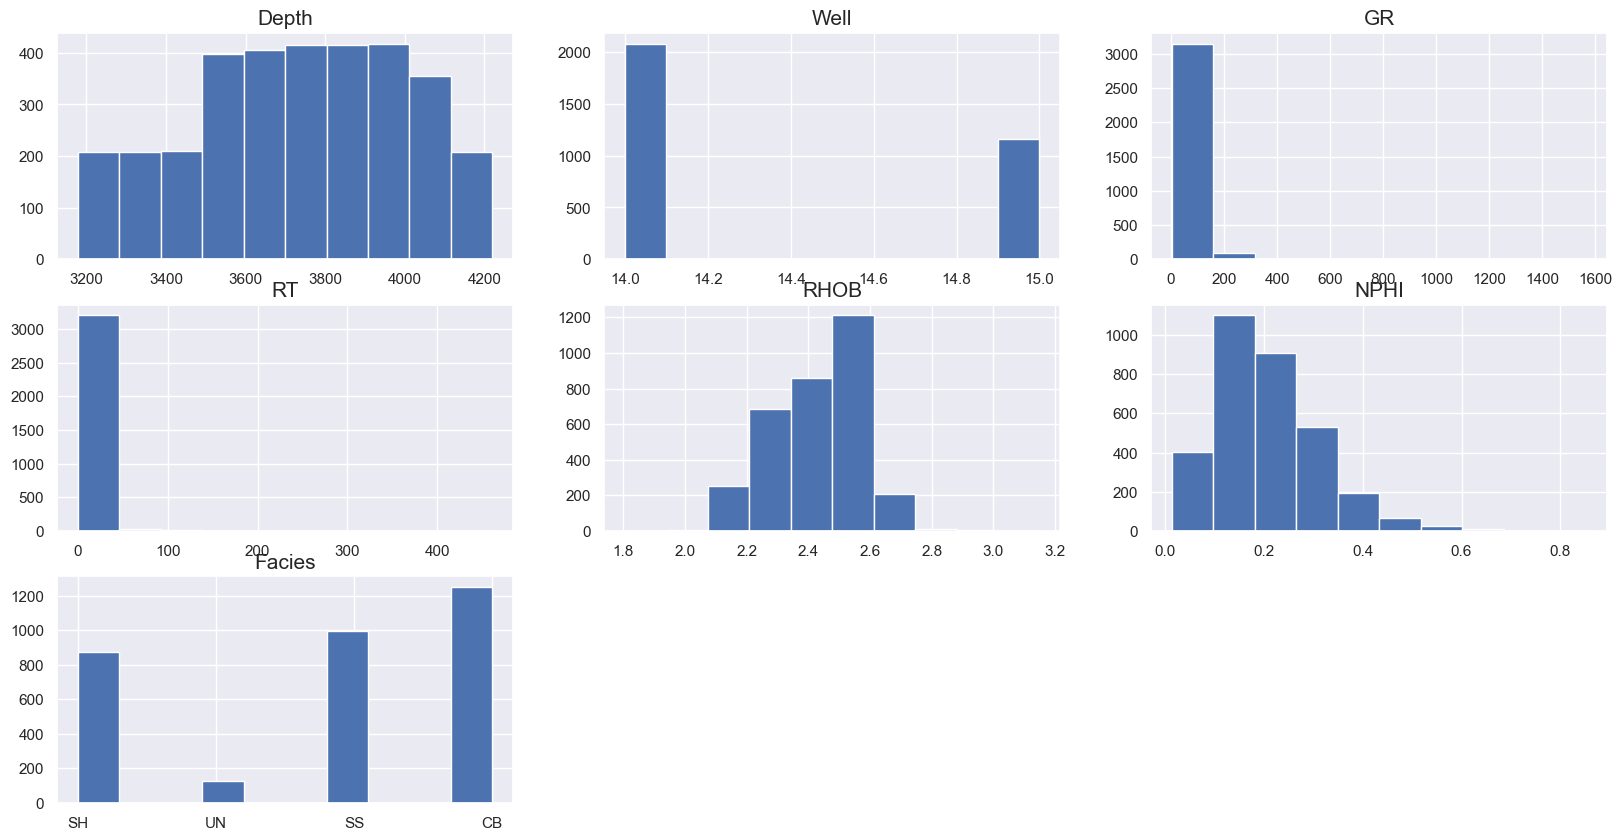

In [145]:
index = 1

plt.figure(figsize=(20,10))

for name in data.columns:
    plt.subplot(3,3,index)
    
    plt.hist(data.loc[:,name])
    
    plt.title(name, fontsize = 15)
    
    index += 1

(array([113., 345., 549., 937., 518., 630., 141.,   5.,   1.,   2.]),
 array([1.29609609, 1.90221595, 2.50833581, 3.11445567, 3.72057553,
        4.32669539, 4.93281525, 5.53893511, 6.14505497, 6.75117483,
        7.35729469]),
 <BarContainer object of 10 artists>)

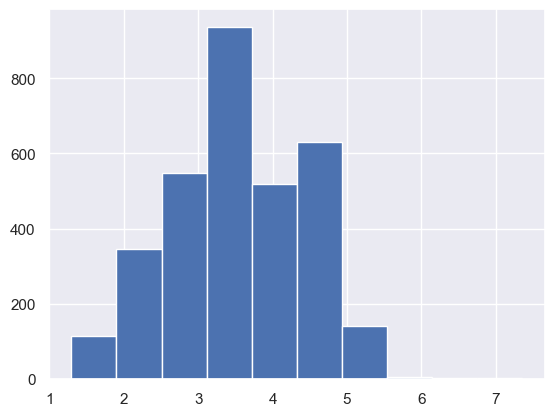

In [146]:
#Log transformation might help for GR and RT
# Logarithmic Transformation of GR
plt.hist(np.log(data['GR']))

(array([  11.,  513.,  391., 1294.,  653.,  257.,   80.,   23.,   17.,
           2.]),
 array([-2.3644605 , -1.51463777, -0.66481505,  0.18500767,  1.0348304 ,
         1.88465312,  2.73447584,  3.58429857,  4.43412129,  5.28394402,
         6.13376674]),
 <BarContainer object of 10 artists>)

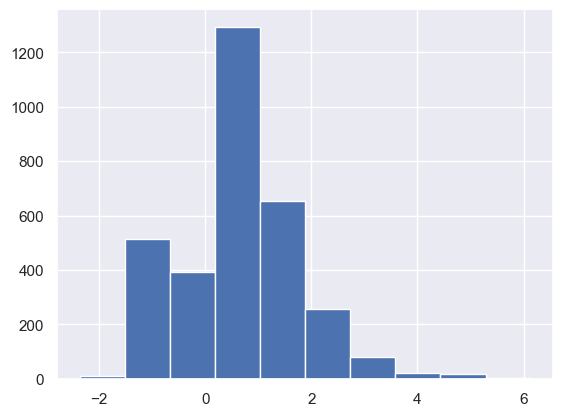

In [147]:
# Logarithmic Transformation of RT
plt.hist(np.log(data['RT']))

In [148]:
data['RT_log'] = np.log10(data.RT) # New feature
data['GR_log'] = np.log10(data.GR) # New feature

In [149]:
data.head()

Depth  Well       GR      RT    RHOB    NPHI Facies    RT_log    GR_log
0  3178.5    14  50.2190  0.5888  2.3296  0.3657     SH -0.230032  1.700868
1  3179.0    14  47.2468  0.7768  2.3170  0.3776     UN -0.109691  1.674372
2  3179.5    14  49.5247  1.0707  2.2960  0.5390     SH  0.029668  1.694822
3  3180.0    14  44.9124  1.4460  2.2514  0.5482     UN  0.160168  1.652366
4  3180.5    14  47.0048  0.9542  2.2733  0.5076     UN -0.020361  1.672142

In [150]:
data.drop('Well', axis= 1, inplace= True) #doesn't seem like well is a useful feature since it's dependent on sheet name

#one - hot encoding

df_encoded = pd.get_dummies(data, columns=['Facies'], dtype= int) #True is 1, False is 0
df_encoded.head()

Depth       GR      RT    RHOB    NPHI    RT_log    GR_log  Facies_CB  \
0  3178.5  50.2190  0.5888  2.3296  0.3657 -0.230032  1.700868          0   
1  3179.0  47.2468  0.7768  2.3170  0.3776 -0.109691  1.674372          0   
2  3179.5  49.5247  1.0707  2.2960  0.5390  0.029668  1.694822          0   
3  3180.0  44.9124  1.4460  2.2514  0.5482  0.160168  1.652366          0   
4  3180.5  47.0048  0.9542  2.2733  0.5076 -0.020361  1.672142          0   

   Facies_SH  Facies_SS  Facies_UN  
0          1          0          0  
1          0          0          1  
2          1          0          0  
3          0          0          1  
4          0          0          1

In [151]:
corr_pearson = df_encoded.corr(method='pearson')

corr_pearson

Depth        GR        RT      RHOB      NPHI    RT_log  \
Depth      1.000000  0.203918  0.022706  0.036966  0.058008 -0.076379   
GR         0.203918  1.000000 -0.058902 -0.061761  0.600947 -0.070969   
RT         0.022706 -0.058902  1.000000 -0.060824 -0.081006  0.505960   
RHOB       0.036966 -0.061761 -0.060824  1.000000 -0.439035  0.397558   
NPHI       0.058008  0.600947 -0.081006 -0.439035  1.000000 -0.266324   
RT_log    -0.076379 -0.070969  0.505960  0.397558 -0.266324  1.000000   
GR_log     0.346693  0.763928 -0.111836 -0.190767  0.760594 -0.206197   
Facies_CB -0.183036 -0.413288  0.030273  0.506655 -0.659833  0.321366   
Facies_SH  0.207793  0.663951 -0.069225  0.044382  0.674244 -0.004650   
Facies_SS  0.013720 -0.214836  0.049715 -0.549172 -0.016357 -0.305211   
Facies_UN -0.048832  0.031047 -0.036435 -0.066770  0.155258 -0.070298   

             GR_log  Facies_CB  Facies_SH  Facies_SS  Facies_UN  
Depth      0.346693  -0.183036   0.207793   0.013720  -0.048832  
GR         0.763928  -0.413288   0.663951  -0.214836   0.031047  
RT        -0.111836   0.030273  -0.069225   0.049715  -0.036435  
RHOB      -0.190767   0.506655   0.044382  -0.549172  -0.066770  
NPHI       0.760594  -0.659833   0.674244  -0.016357   0.155258  
RT_log    -0.206197   0.321366  -0.004650  -0.305211  -0.070298  
GR_log     1.000000  -0.630412   0.748205  -0.097564   0.105065  
Facies_CB -0.630412   1.000000  -0.480033  -0.527804  -0.157935  
Facies_SH  0.748205  -0.480033   1.000000  -0.404083  -0.120914  
Facies_SS -0.097564  -0.527804  -0.404083   1.000000  -0.132947  
Facies_UN  0.105065  -0.157935  -0.120914  -0.132947   1.000000

Text(0.5, 1.0, 'Pearson Correlation Heatmap')

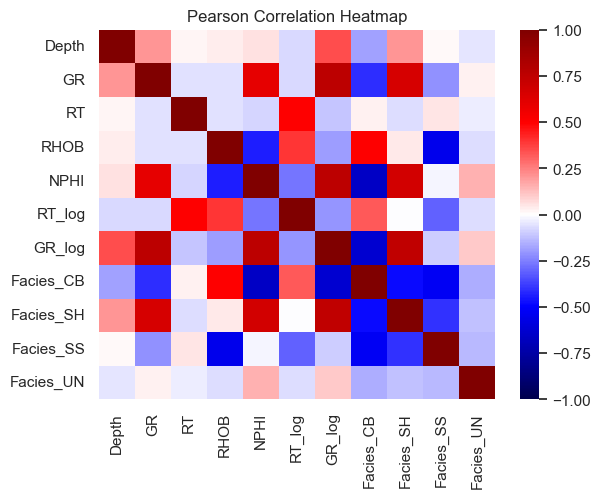

In [152]:
ax = sns.heatmap(corr_pearson, xticklabels=corr_pearson.columns, yticklabels=corr_pearson.columns, center=0, vmin=-1, vmax=1, cmap='seismic')

# Set the title of the heatmap
ax.set_title('Pearson Correlation Heatmap')

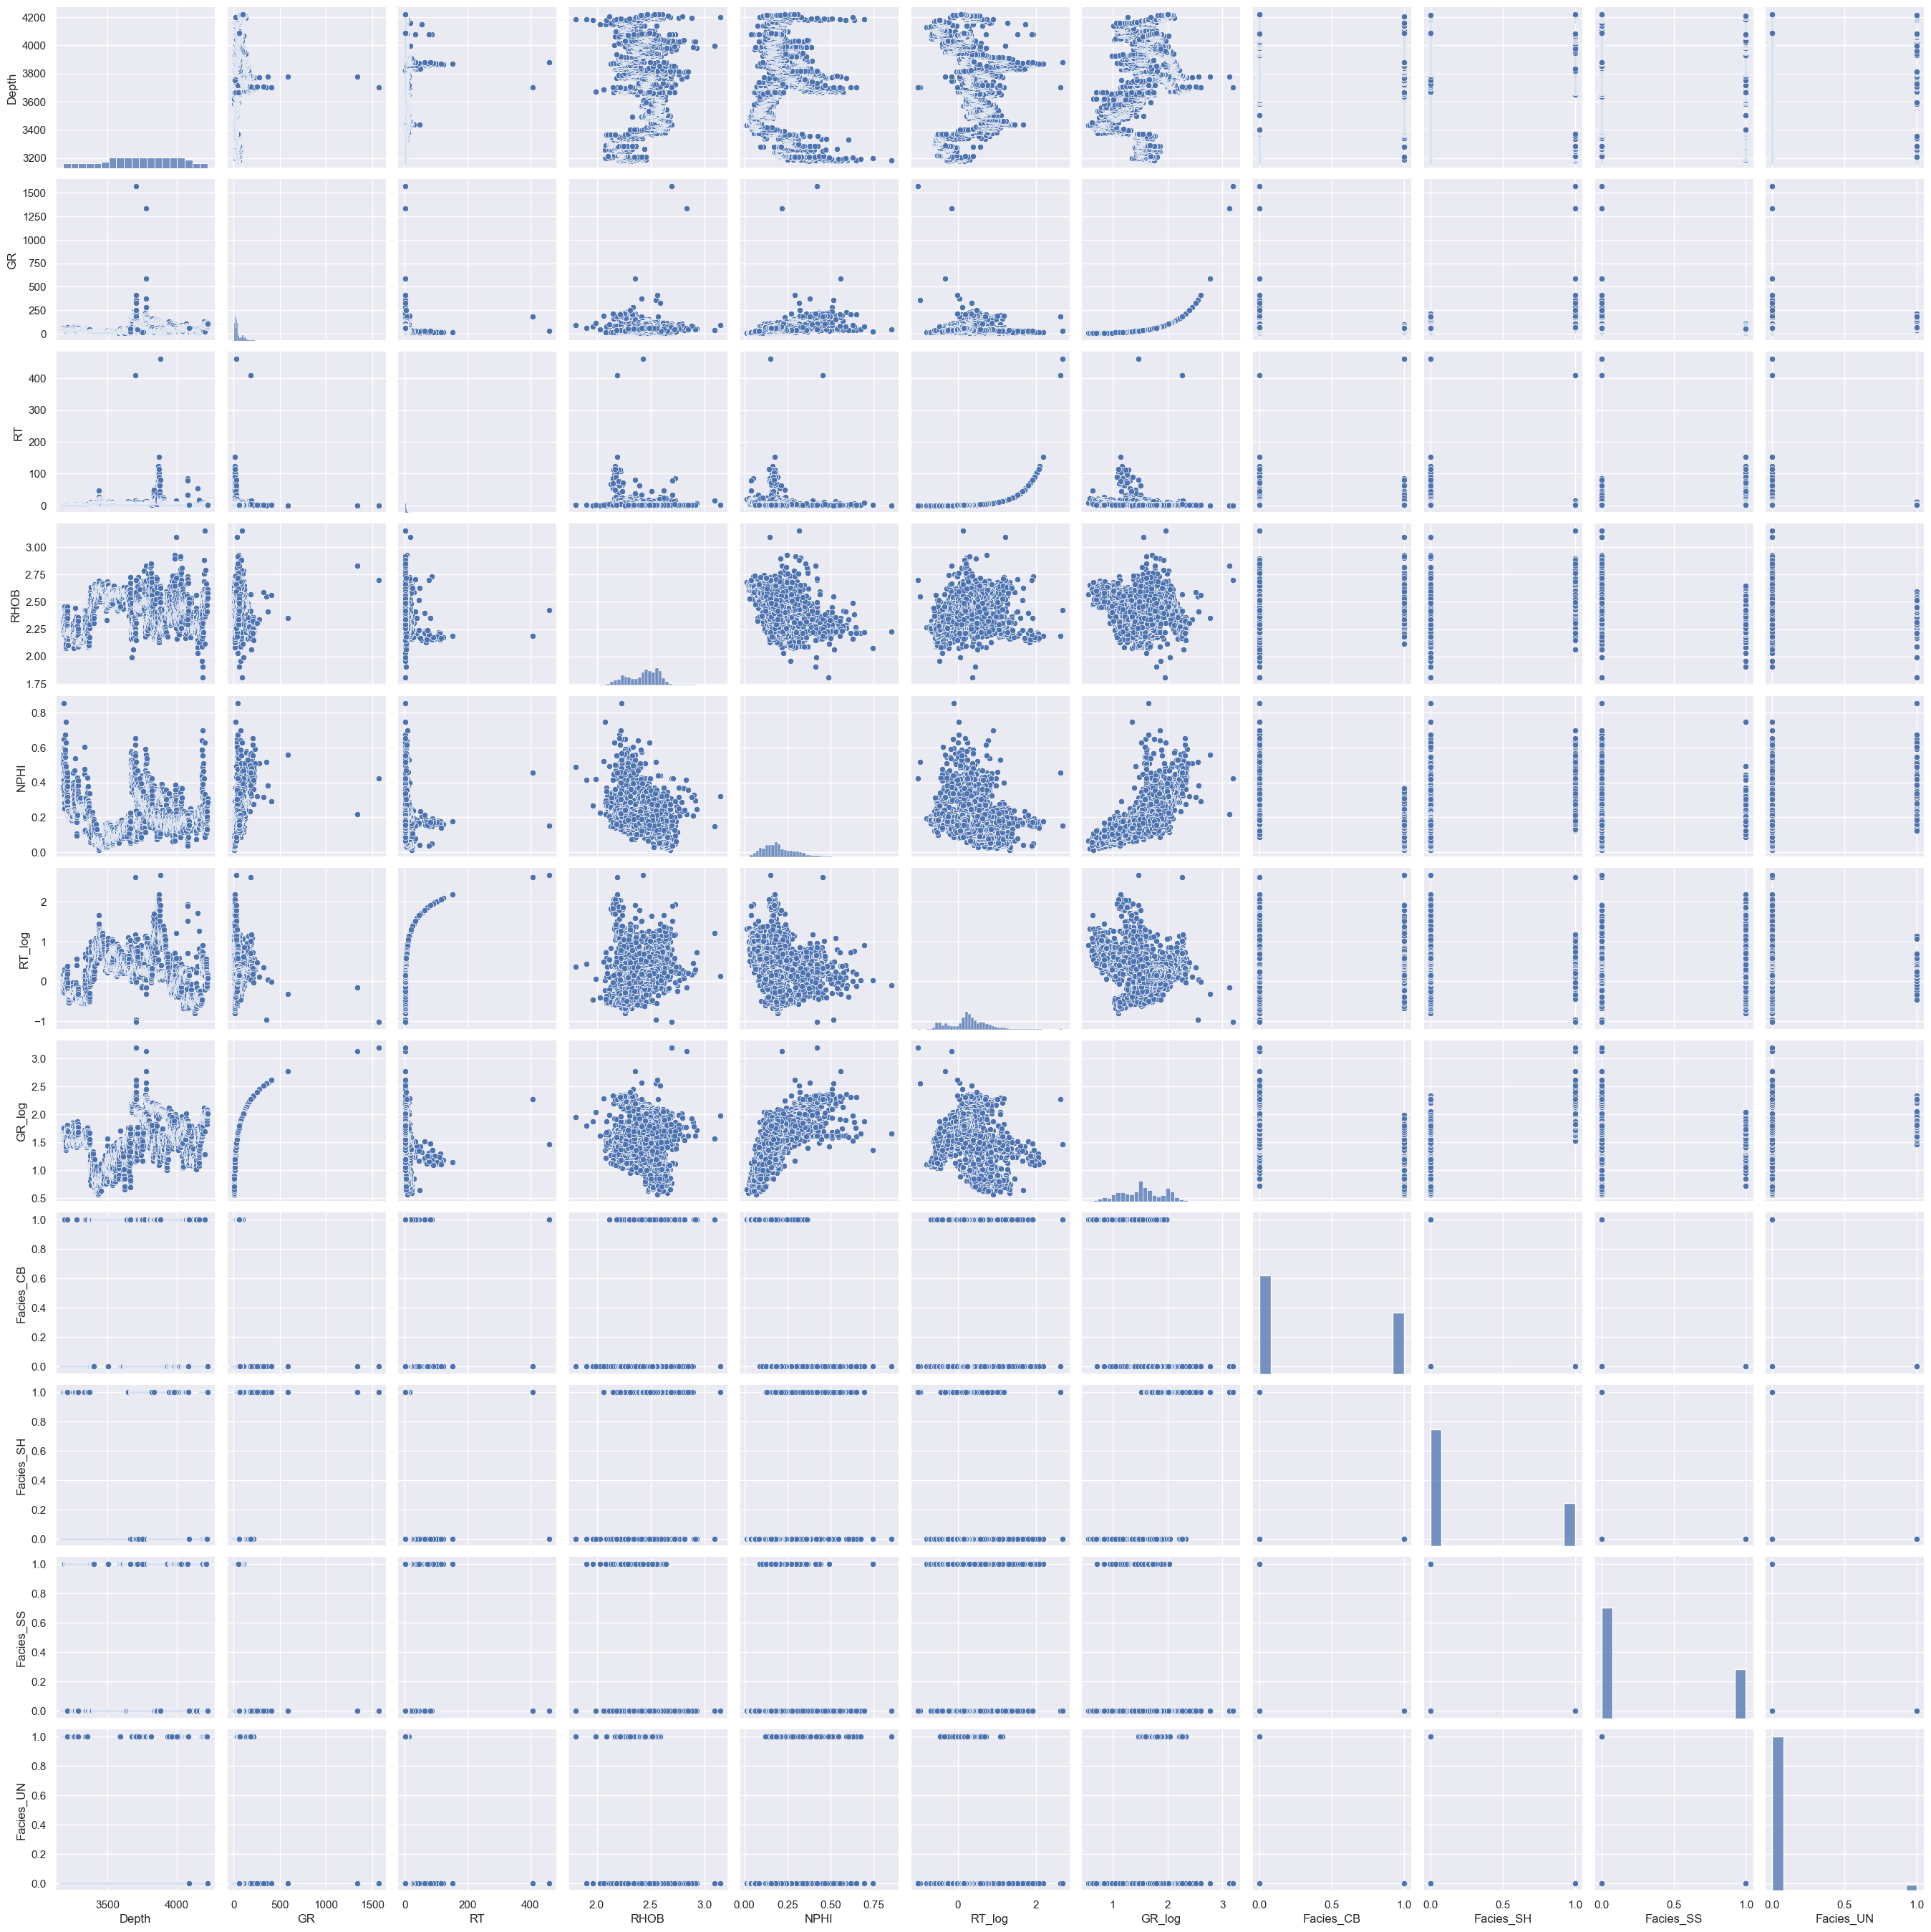

In [153]:
sns.pairplot(df_encoded)

In [154]:
# 2 more new features
df_encoded['Magnitude_GR_RT'] = np.sqrt(df_encoded['GR']**2 + df_encoded['RT']**2)
df_encoded['Angle_GR_RT'] = np.arctan2(df_encoded['RT'], df_encoded['GR'])

#dropping GR and RT since we have their log values
df_encoded.drop(['RT','GR'], inplace = True,axis = 1) # drop the original RT and GR

In [155]:
corr_pearson = df_encoded.corr(method='pearson')

corr_pearson

Depth      RHOB      NPHI    RT_log    GR_log  Facies_CB  \
Depth            1.000000  0.036966  0.058008 -0.076379  0.346693  -0.183036   
RHOB             0.036966  1.000000 -0.439035  0.397558 -0.190767   0.506655   
NPHI             0.058008 -0.439035  1.000000 -0.266324  0.760594  -0.659833   
RT_log          -0.076379  0.397558 -0.266324  1.000000 -0.206197   0.321366   
GR_log           0.346693 -0.190767  0.760594 -0.206197  1.000000  -0.630412   
Facies_CB       -0.183036  0.506655 -0.659833  0.321366 -0.630412   1.000000   
Facies_SH        0.207793  0.044382  0.674244 -0.004650  0.748205  -0.480033   
Facies_SS        0.013720 -0.549172 -0.016357 -0.305211 -0.097564  -0.527804   
Facies_UN       -0.048832 -0.066770  0.155258 -0.070298  0.105065  -0.157935   
Magnitude_GR_RT  0.206746 -0.078345  0.582205  0.010789  0.735379  -0.408175   
Angle_GR_RT     -0.214104  0.217746 -0.480502  0.739667 -0.610170   0.399694   

                 Facies_SH  Facies_SS  Facies_UN  Magnitude_GR_RT  Angle_GR_RT  
Depth             0.207793   0.013720  -0.048832         0.206746    -0.214104  
RHOB              0.044382  -0.549172  -0.066770        -0.078345     0.217746  
NPHI              0.674244  -0.016357   0.155258         0.582205    -0.480502  
RT_log           -0.004650  -0.305211  -0.070298         0.010789     0.739667  
GR_log            0.748205  -0.097564   0.105065         0.735379    -0.610170  
Facies_CB        -0.480033  -0.527804  -0.157935        -0.408175     0.399694  
Facies_SH         1.000000  -0.404083  -0.120914         0.644603    -0.313072  
Facies_SS        -0.404083   1.000000  -0.132947        -0.199277    -0.080102  
Facies_UN        -0.120914  -0.132947   1.000000         0.025352    -0.097850  
Magnitude_GR_RT   0.644603  -0.199277   0.025352         1.000000    -0.227027  
Angle_GR_RT      -0.313072  -0.080102  -0.097850        -0.227027     1.000000

## Outlier Removal

In [156]:
df_encoded.shape

(3241, 11)

In [157]:
#Classification problem, so F_classif and mi classif
X = df_encoded.drop(columns= ['Facies_CB', 'Facies_SH', 'Facies_SS', 'Facies_UN'], axis = 1)
Y = df_encoded[['Facies_CB', 'Facies_SH', 'Facies_SS', 'Facies_UN']]

In [158]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(contamination = 0.05)

iforest.fit(X)

label = iforest.predict(X)

data_i_x = X[label == 1]
data_i_y = Y[label == 1]

In [159]:
data_i_x.shape

(3079, 7)

In [160]:
data_i_y.shape

(3079, 4)

In [161]:
import pickle 
filename = 'outlier.sav'
pickle.dump(iforest, open(filename, 'wb'))

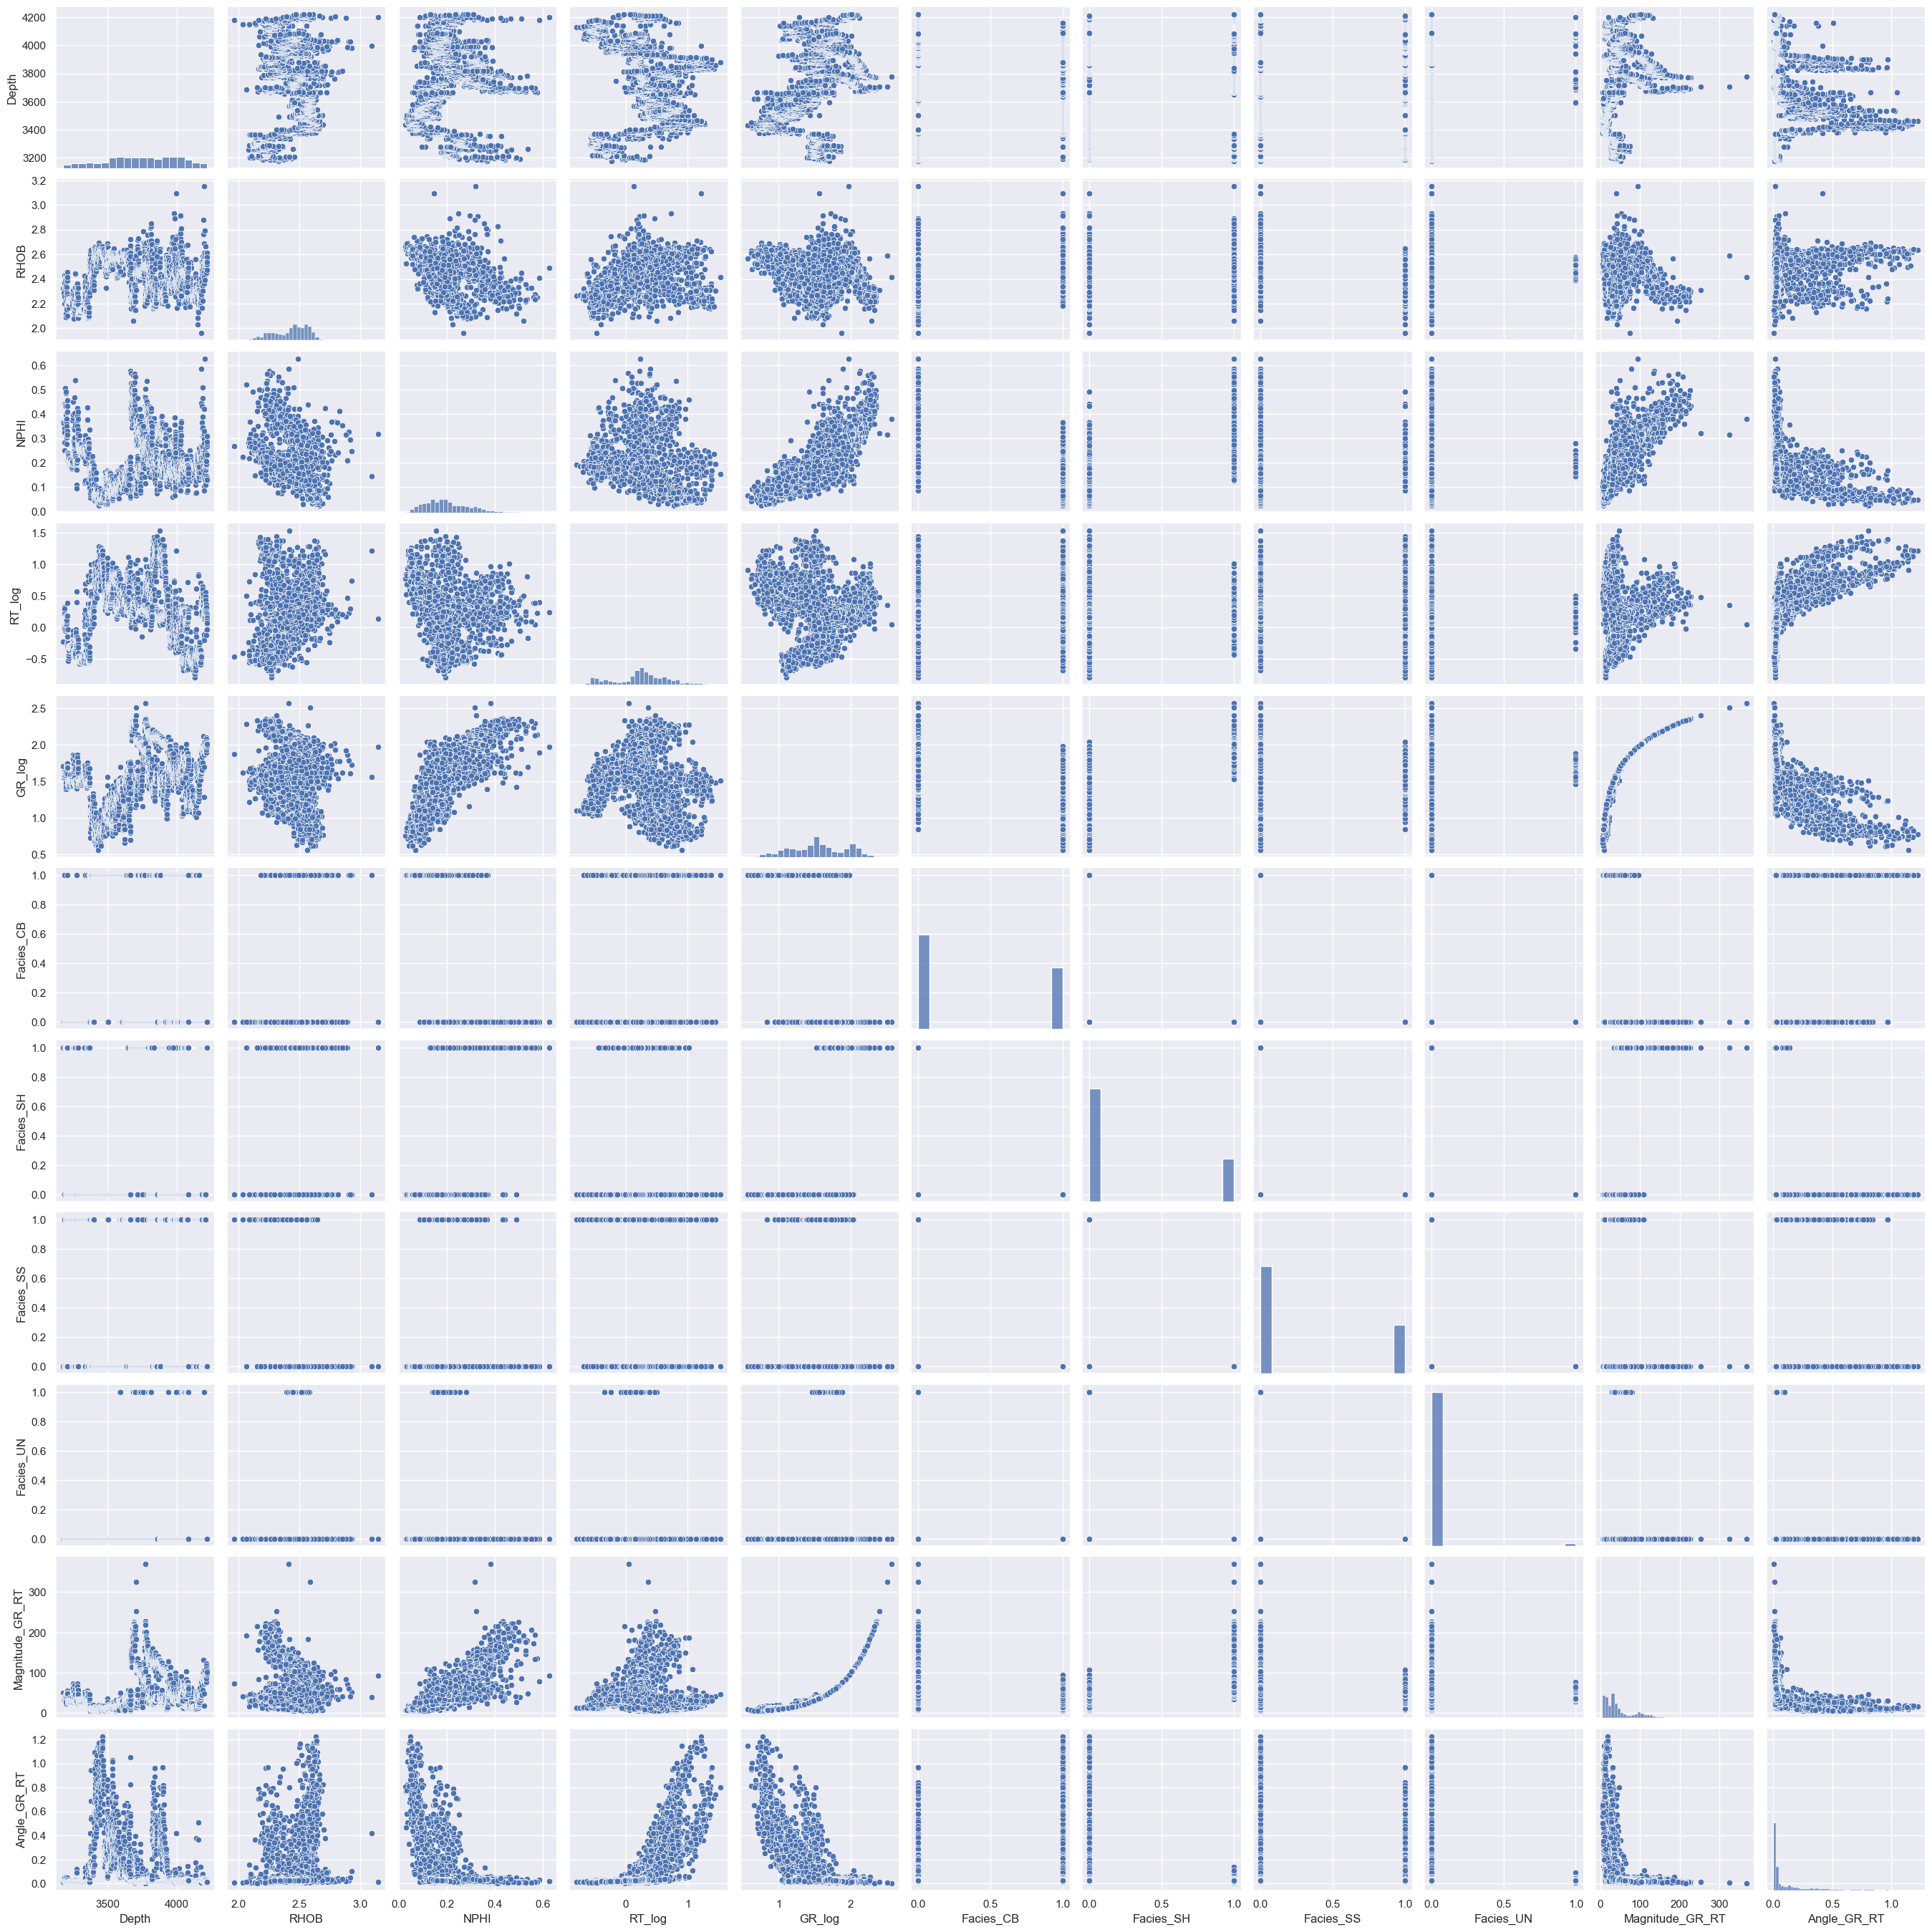

In [162]:
sns.pairplot(data_i)

## Scaling

In [163]:
data_i_x

Depth    RHOB    NPHI    RT_log    GR_log  Magnitude_GR_RT  Angle_GR_RT
0     3178.5  2.3296  0.3657 -0.230032  1.700868        50.222452     0.011724
1     3179.0  2.3170  0.3776 -0.109691  1.674372        47.253185     0.016440
4     3180.5  2.2733  0.5076 -0.020361  1.672142        47.014484     0.020297
5     3181.0  2.2463  0.4549 -0.258533  1.690738        49.064299     0.011239
7     3182.0  2.2153  0.5207 -0.070734  1.617800        41.485003     0.020484
...      ...     ...     ...       ...       ...              ...          ...
1154  4083.5  2.4851  0.1416  0.245266  1.776018        59.731905     0.029453
1155  4084.0  2.4860  0.1416  0.217747  1.766539        58.440326     0.028255
1156  4084.5  2.5311  0.1527  0.203305  1.759660        57.521174     0.027767
1157  4085.0  2.4731  0.1785  0.170848  1.754234        56.804336     0.026093
1158  4085.5  2.4920  0.1566  0.156852  1.790440        61.738679     0.023245

[3079 rows x 7 columns]

In [164]:
# Import methods for scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(data_i_x) 
data_i_s = ss.transform(data_i_x) 

df_scaled = pd.DataFrame(data_i_s, columns=data_i_x.columns, index=data_i_x.index)

df_scaled = pd.concat([df_scaled, data_i_y], axis=1)

In [165]:
df_scaled.head()

Depth      RHOB      NPHI    RT_log    GR_log  Magnitude_GR_RT  \
0 -2.119168 -0.739038  1.681768 -1.074438  0.401265        -0.011947   
1 -2.117274 -0.827443  1.806907 -0.798046  0.330265        -0.082713   
4 -2.111594 -1.134056  3.173974 -0.592878  0.324289        -0.088402   
5 -2.109701 -1.323496  2.619786 -1.139897  0.374120        -0.039549   
7 -2.105914 -1.541002  3.311732 -0.708573  0.178669        -0.220185   

   Angle_GR_RT  Facies_CB  Facies_SH  Facies_SS  Facies_UN  
0    -0.604208          0          1          0          0  
1    -0.579276          0          0          0          1  
4    -0.558882          0          0          0          1  
5    -0.606775          0          1          0          0  
7    -0.557897          0          0          0          1

In [166]:
df_scaled.shape

(3079, 11)

In [167]:
filename = 'scale.sav'
pickle.dump(ss, open(filename, 'wb'))

## Collinearity

In [168]:
corr_pearson = df_scaled.corr(method='pearson')

corr_pearson
#Since threshold is 0.9, there are no features that exceed 0.9

Depth      RHOB      NPHI    RT_log    GR_log  \
Depth            1.000000  0.067782  0.079347 -0.095796  0.348455   
RHOB             0.067782  1.000000 -0.420823  0.517316 -0.175139   
NPHI             0.079347 -0.420823  1.000000 -0.256029  0.782687   
RT_log          -0.095796  0.517316 -0.256029  1.000000 -0.130081   
GR_log           0.348455 -0.175139  0.782687 -0.130081  1.000000   
Magnitude_GR_RT  0.276870 -0.104332  0.772081  0.025553  0.909739   
Angle_GR_RT     -0.276862  0.332920 -0.557846  0.676499 -0.653444   
Facies_CB       -0.171721  0.486837 -0.681803  0.352289 -0.633808   
Facies_SH        0.213194  0.059148  0.705149  0.047175  0.753652   
Facies_SS       -0.013903 -0.551782 -0.003732 -0.394046 -0.101600   
Facies_UN       -0.026266 -0.042433  0.104361 -0.054026  0.106117   

                 Magnitude_GR_RT  Angle_GR_RT  Facies_CB  Facies_SH  \
Depth                   0.276870    -0.276862  -0.171721   0.213194   
RHOB                   -0.104332     0.332920   0.486837   0.059148   
NPHI                    0.772081    -0.557846  -0.681803   0.705149   
RT_log                  0.025553     0.676499   0.352289   0.047175   
GR_log                  0.909739    -0.653444  -0.633808   0.753652   
Magnitude_GR_RT         1.000000    -0.443478  -0.526874   0.834097   
Angle_GR_RT            -0.443478     1.000000   0.504609  -0.341208   
Facies_CB              -0.526874     0.504609   1.000000  -0.480915   
Facies_SH               0.834097    -0.341208  -0.480915   1.000000   
Facies_SS              -0.269140    -0.162085  -0.527005  -0.408435   
Facies_UN               0.050958    -0.099513  -0.153049  -0.118615   

                 Facies_SS  Facies_UN  
Depth            -0.013903  -0.026266  
RHOB             -0.551782  -0.042433  
NPHI             -0.003732   0.104361  
RT_log           -0.394046  -0.054026  
GR_log           -0.101600   0.106117  
Magnitude_GR_RT  -0.269140   0.050958  
Angle_GR_RT      -0.162085  -0.099513  
Facies_CB        -0.527005  -0.153049  
Facies_SH        -0.408435  -0.118615  
Facies_SS         1.000000  -0.129983  
Facies_UN        -0.129983   1.000000

<Axes: >

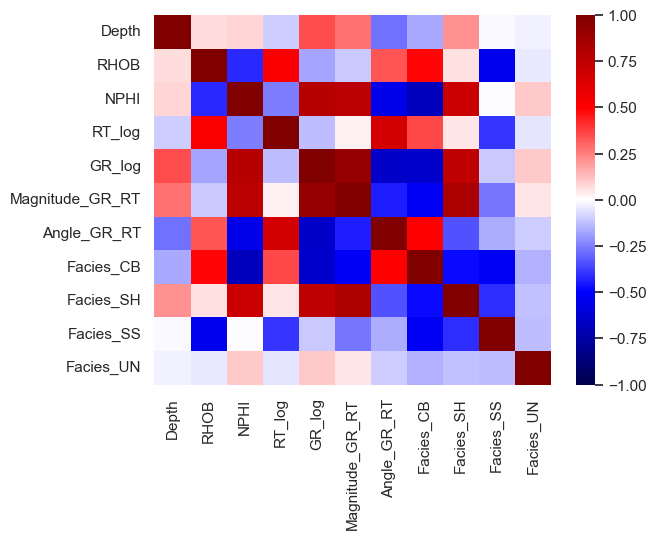

In [169]:
sns.heatmap(corr_pearson, xticklabels=corr_pearson.columns, yticklabels=corr_pearson.columns,center=0, vmin=-1, vmax=1,cmap='seismic')

## Association Test

In [170]:
#Reversing the one-hot encoding on the target since data preprocessing ie scaling and computing correlation is done

facies_columns = ['Facies_CB', 'Facies_SH', 'Facies_SS', 'Facies_UN']
facies_labels = ['CB', 'SH', 'SS', 'UN']

df_scaled['Facies'] = df_scaled[facies_columns].idxmax(axis=1).str.replace('Facies_', '')
df_scaled.drop(columns= facies_columns, inplace= True, axis = 1)

In [171]:
df_scaled.head()

Depth      RHOB      NPHI    RT_log    GR_log  Magnitude_GR_RT  \
0 -2.119168 -0.739038  1.681768 -1.074438  0.401265        -0.011947   
1 -2.117274 -0.827443  1.806907 -0.798046  0.330265        -0.082713   
4 -2.111594 -1.134056  3.173974 -0.592878  0.324289        -0.088402   
5 -2.109701 -1.323496  2.619786 -1.139897  0.374120        -0.039549   
7 -2.105914 -1.541002  3.311732 -0.708573  0.178669        -0.220185   

   Angle_GR_RT Facies  
0    -0.604208     SH  
1    -0.579276     UN  
4    -0.558882     UN  
5    -0.606775     SH  
7    -0.557897     UN

In [172]:
from sklearn.feature_selection import f_classif, mutual_info_classif
#Classification problem, so F_classif and mi classif
X = df_scaled.drop(columns= ['Facies'], axis = 1)
Y = df_scaled[['Facies']]

In [173]:
Y.shape

(3079, 1)

In [174]:
X.shape

(3079, 7)

In [175]:
F, p = f_classif(X, Y) #computing F score and p from train data and target
mi = mutual_info_classif(X, Y, random_state = 42) 

Text(0.5, 0, 'features')

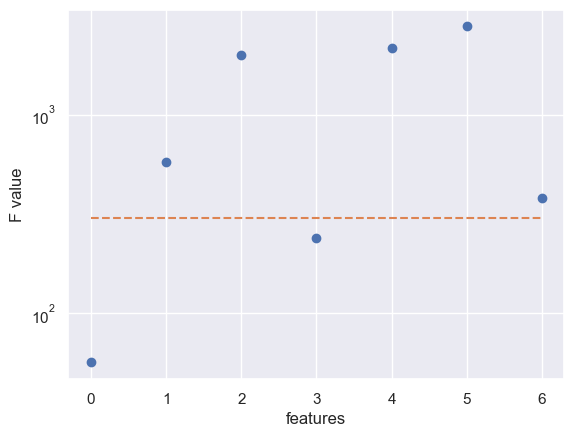

In [176]:
#Plot for F
plt.figure()
plt.plot(F, 'o')
plt.semilogy(300*np.ones(len(F)), '--') 
plt.ylabel('F value')
plt.xlabel('features')

Text(0.5, 0, 'features')

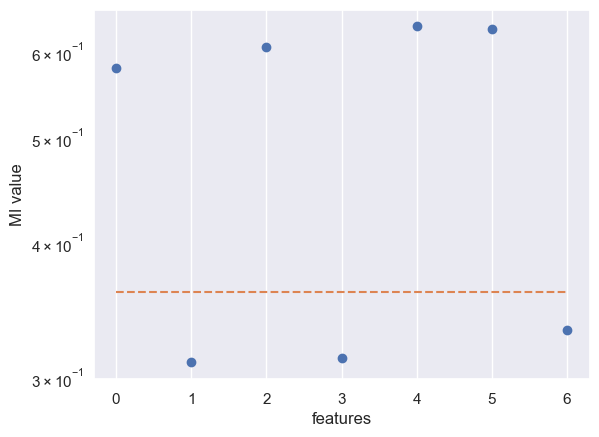

In [177]:
#Plot for MI
plt.figure()
plt.plot(mi, 'o')
plt.semilogy(0.36*np.ones(len(mi)), '--') 
plt.ylabel('MI value')
plt.xlabel('features')

Text(0.5, 0, 'features')

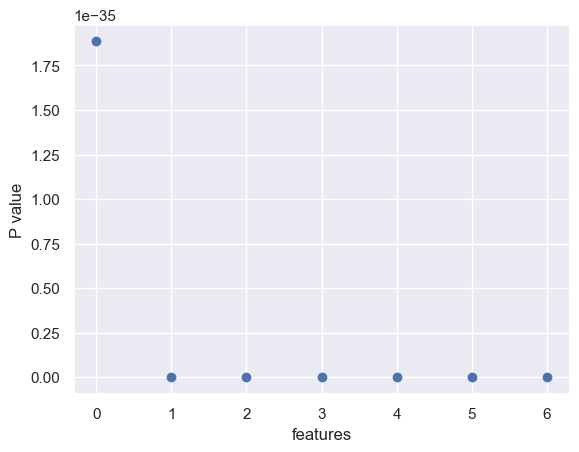

In [178]:
#Plot for P
plt.figure()
plt.plot(p, 'o')
# plt.semilogy(0.33*np.ones(len(mi)), '--') 
plt.ylabel('P value')
plt.xlabel('features')

In [243]:
fileF = 'Deploy_F_Values.sav'

pickle.dump(F, open(fileF, 'wb'))

filemi = 'Deploy_mi_Values.sav'

pickle.dump(mi, open(filemi, 'wb'))

In [179]:
#Not using p value since most of the features don't have a high p value, considering we have to do PCA afterwards

#choosing features with F score greater than 300 or mi greater than 0.36
mask = (F>300)|(mi>0.36)
print('no. of significant features from scaled data post f and mi filter: {}'.format(len(p[mask]))) 

no. of significant features from scaled data post f and mi filter: 6


In [180]:
#Creating data after f and mi filter using the mask
x_assoc = X.iloc[:, mask]
print('X post f and mi filter= ', x_assoc.shape)

X post f and mi filter=  (3079, 6)


In [242]:
x_assoc.head()

Depth      RHOB      NPHI    GR_log  Magnitude_GR_RT  Angle_GR_RT
0 -2.119168 -0.739038  1.681768  0.401265        -0.011947    -0.604208
1 -2.117274 -0.827443  1.806907  0.330265        -0.082713    -0.579276
4 -2.111594 -1.134056  3.173974  0.324289        -0.088402    -0.558882
5 -2.109701 -1.323496  2.619786  0.374120        -0.039549    -0.606775
7 -2.105914 -1.541002  3.311732  0.178669        -0.220185    -0.557897

In [181]:
#Pickling the mask

fileMask = 'Deploy_Association_Test.sav'

pickle.dump(mask, open(fileMask, 'wb'))

## Feature Transformation- Quantile Transform

In [182]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=100, output_distribution='uniform', random_state=42)

x_assoc_transformed = qt.fit_transform(x_assoc)

In [183]:
# Checking the shape and perhaps the first few rows to verify everything went as expected
print("Transformed features shape:", x_assoc_transformed.shape)

#Convert back to a DataFrame for further use with column names
x_assoc_transformed_df = pd.DataFrame(x_assoc_transformed, columns=x_assoc.columns, index=x_assoc.index)
x_assoc_transformed_df.head()

Transformed features shape: (3079, 6)


Depth      RHOB      NPHI    GR_log  Magnitude_GR_RT  Angle_GR_RT
0  0.000000  0.261862  0.935986  0.670309         0.669858     0.123578
1  0.000206  0.246024  0.947310  0.646699         0.646524     0.285382
4  0.000823  0.177384  0.992372  0.644907         0.644691     0.375814
5  0.001029  0.131159  0.985692  0.660965         0.660477     0.109207
7  0.001440  0.079325  0.993203  0.595873         0.590833     0.379224

In [184]:
#Pickling the quantile transformer

qtFile = 'Deploy_QT.sav'

pickle.dump(qt, open(qtFile, 'wb'))

## Clustering Labels

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_assoc_transformed_df, Y, test_size=0.2, random_state=42, stratify= Y)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2463, 6)
(616, 6)
(2463, 1)
(616, 1)


In [186]:
from sklearn.cluster import KMeans

def elbow_plot(X, n):
    """Inputs:
        X (2-D Array): Feature Matrix for clustering
        
        n (int): Number of clusters to consider
        
        Outputs: Elbow Plot
    """
    sns.set()
    inertia = []
    sil_score = []
    for i in range(n):
        kmeans = KMeans(n_clusters = i+1)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_) ## calculated for each value of K

    x = np.arange(n) + 1
    
    plt.figure(figsize = (12,8))
    plt.plot(x, inertia, '-o')
    plt.xlabel('Number of Clusters', fontsize = 15)
    plt.ylabel('Inertia', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.title('Elbow Plot')

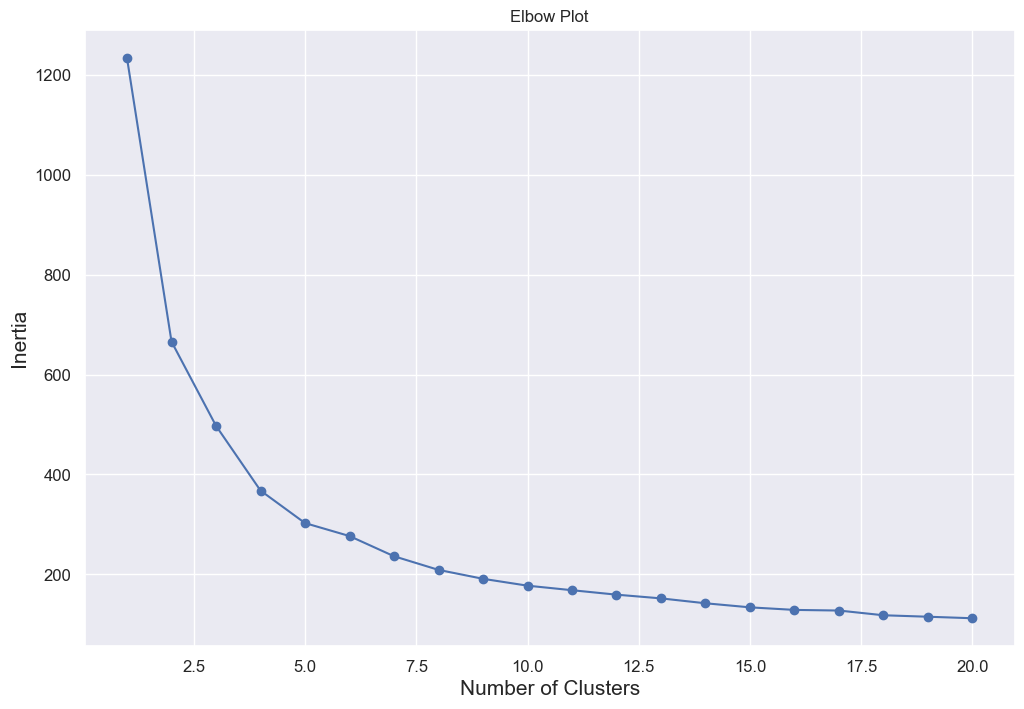

In [187]:
elbow_plot(X_train, 20)

In [188]:
#Second clustering technique I've chosen is Meanshift

from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_train, quantile=.17)
bandwidth

0.5383014563648668

In [189]:
#From elbow method, looks like the ideal number of clusters is 5

kmeans = KMeans(n_clusters=5, random_state=42)

# Apply Mean Shift with the estimated bandwidth
mean_shift = MeanShift(bandwidth=bandwidth)

# Fit on training data
kmeans.fit(X_train)
mean_shift.fit(X_train)

# Generate cluster labels for training data
train_kmeans_labels = kmeans.labels_
# Get cluster labels for training data
train_meanshift_labels = mean_shift.labels_

# Apply clustering model to generate labels for testing data
test_kmeans_labels = kmeans.predict(X_test)
test_meanshift_labels = mean_shift.predict(X_test)

# Append cluster labels as new features to the original train and test data
X_train['cluster_kmeans'] = train_kmeans_labels
X_test['cluster_kmeans'] = test_kmeans_labels
X_test['cluster_meanshift'] = test_meanshift_labels
X_train['cluster_meanshift'] = train_meanshift_labels

In [190]:
#Pickling the clsutering techniques

kmeansLabels = 'Deploy_Kmeans_Labels.sav'

pickle.dump(kmeans, open(kmeansLabels, 'wb'))

meanshiftLabels = 'Deploy_Meanshift_Labels.sav'

pickle.dump(mean_shift, open(meanshiftLabels, 'wb'))

In [191]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2463, 8)
(616, 8)
(2463, 1)
(616, 1)


## ML Algorithms

### 1. Logistic Regression

In [192]:
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import KFold  ### import
from sklearn.model_selection import GridSearchCV

cv3 = KFold(n_splits=3, shuffle = True, random_state = 42) #3 fold cross validation

In [193]:
lrc = LogisticRegression(penalty='elasticnet', solver= 'saga', random_state= 42)

param_grid_lrc = {'C': [0.1, 0.3, 0.5, 0.6], 
               'l1_ratio':[0, 0.5, 1], 
               'max_iter':[100, 1000]} 

In [194]:
gridLRC = GridSearchCV(lrc, param_grid= param_grid_lrc, cv= cv3, verbose=3)  # estimator

gridLRC.fit(X_train, Y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3] END ...C=0.1, l1_ratio=0, max_iter=100;, score=0.806 total time=   0.0s
[CV 2/3] END ...C=0.1, l1_ratio=0, max_iter=100;, score=0.828 total time=   0.0s
[CV 3/3] END ...C=0.1, l1_ratio=0, max_iter=100;, score=0.810 total time=   0.0s
[CV 1/3] END ..C=0.1, l1_ratio=0, max_iter=1000;, score=0.806 total time=   0.0s
[CV 2/3] END ..C=0.1, l1_ratio=0, max_iter=1000;, score=0.828 total time=   0.0s
[CV 3/3] END ..C=0.1, l1_ratio=0, max_iter=1000;, score=0.810 total time=   0.0s
[CV 1/3] END .C=0.1, l1_ratio=0.5, max_iter=100;, score=0.805 total time=   0.0s
[CV 2/3] END .C=0.1, l1_ratio=0.5, max_iter=100;, score=0.828 total time=   0.0s
[CV 3/3] END .C=0.1, l1_ratio=0.5, max_iter=100;, score=0.812 total time=   0.0s
[CV 1/3] END C=0.1, l1_ratio=0.5, max_iter=1000;, score=0.805 total time=   0.0s
[CV 2/3] END C=0.1, l1_ratio=0.5, max_iter=1000;, score=0.828 total time=   0.0s
[CV 3/3] END C=0.1, l1_ratio=0.5, max_iter=1000;

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(penalty='elasticnet', random_state=42,
                                          solver='saga'),
             param_grid={'C': [0.1, 0.3, 0.5, 0.6], 'l1_ratio': [0, 0.5, 1],
                         'max_iter': [100, 1000]},
             verbose=3)

In [195]:
print('Best cross validation score LR: ', gridLRC.best_score_)
print('Best params to predict LR: ', gridLRC.best_params_)
lrcBest = gridLRC.best_estimator_ 
lrcBestParams = gridLRC.best_params_

Best cross validation score LR:  0.8489646772228988
Best params to predict LR:  {'C': 0.6, 'l1_ratio': 1, 'max_iter': 1000}


In [196]:
from sklearn.metrics import f1_score, roc_auc_score, matthews_corrcoef
from sklearn.model_selection import cross_val_predict

# Predict on test data
y_pred = lrcBest.predict(X_test)
y_proba = lrcBest.predict_proba(X_test)  # Use probabilities for all classes

# F1 Score
f1_lrc = f1_score(Y_test, y_pred, average= 'weighted') #class imbalance so weighted

# AUC-ROC Score
# Ensure Y_test is properly encoded if necessary, e.g., using label_binarize for multi-class
from sklearn.preprocessing import label_binarize
classes = np.unique(Y_train)  # This should cover all your class labels
Y_test_binarized = label_binarize(Y_test, classes=classes)

# Now calculate AUC using OvO strategy
auc_lrc = roc_auc_score(Y_test_binarized, y_proba, multi_class='ovo')

# Matthews Correlation Coefficient
mcc_lrc = matthews_corrcoef(Y_test, y_pred)

print("F1 Score: ", f1_lrc)
print("AUC-ROC Score: ", auc_lrc)
print("Matthews Correlation Coefficient: ", mcc_lrc)

F1 Score:  0.8045186604793269
AUC-ROC Score:  0.9571799128419214
Matthews Correlation Coefficient:  0.7334131385739759


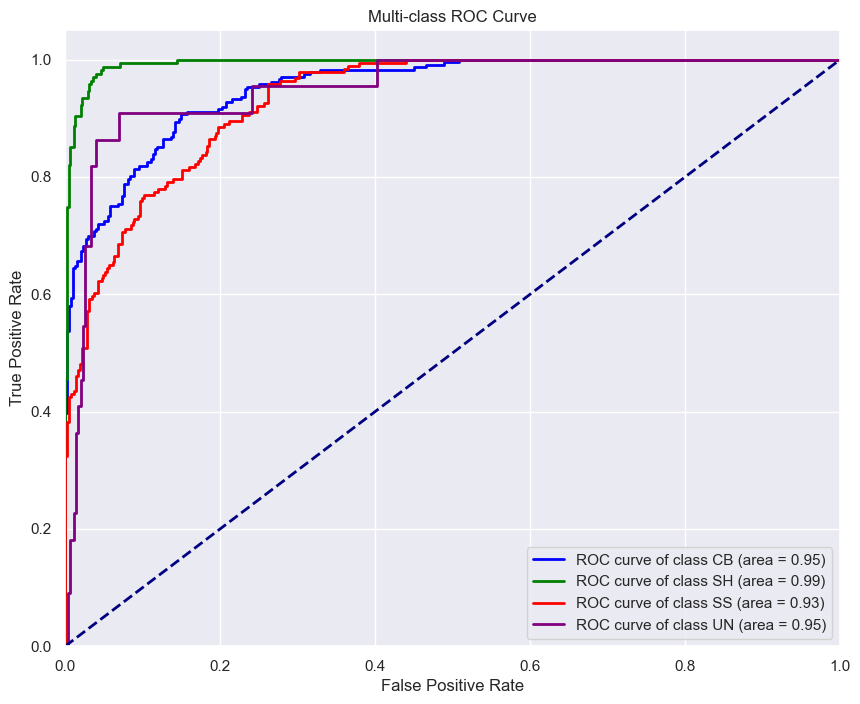

In [197]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already calculated 'y_proba' and 'Y_test_binarized' as previously described
classes = np.unique(Y_train)  # Ensure this covers all class labels, 'SS', 'CB', 'SH', 'UN'

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(Y_test_binarized[:, i], y_proba[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plotting the ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple']  # Colors for each line
for i, class_label in enumerate(classes):
    plt.plot(fpr[class_label], tpr[class_label], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_label, roc_auc[class_label]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 2. K Nearest Neighbours

In [198]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  # reasonable values to test, can adjust based on dataset size
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']  # commonly used metrics
}

In [199]:
# Setup GridSearchCV
gridKNN = GridSearchCV(knn, param_grid=param_grid_knn, cv=cv3, verbose=3)  # can change scoring to f1_macro if needed

# Fit GridSearchCV
gridKNN.fit(X_train, Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.867 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.884 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.868 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.870 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.892 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.872 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.865 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.889 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.877 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=5, weights=distance;, score=0.868 tota

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 10, 15],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [200]:
# Best parameters and best score
print('Best cross-validation score KNN: ', gridKNN.best_score_)
print('Best parameters for KNN: ', gridKNN.best_params_)

# Get the best estimator directly
best_knn = gridKNN.best_estimator_
knnBestParams = gridKNN.best_params_

Best cross-validation score KNN:  0.8867235079171741
Best parameters for KNN:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [201]:
# Predict on test data
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)  # Use probabilities for all classes

# F1 Score
f1_knn = f1_score(Y_test, y_pred, average= 'weighted') #class imbalance so weighted

# AUC-ROC Score
# Ensure Y_test is properly encoded if necessary, e.g., using label_binarize for multi-class

classes = np.unique(Y_train)  # This should cover all your class labels
Y_test_binarized = label_binarize(Y_test, classes=classes)

# Now calculate AUC using OvO strategy
auc_knn = roc_auc_score(Y_test_binarized, y_proba, multi_class='ovo')

# Matthews Correlation Coefficient
mcc_knn = matthews_corrcoef(Y_test, y_pred)

print("F1 Score knn: ", f1_knn)
print("AUC-ROC Score knn: ", auc_knn)
print("Matthews Correlation Coefficient knn: ", mcc_knn)

F1 Score knn:  0.87341019658282
AUC-ROC Score knn:  0.9603363780202611
Matthews Correlation Coefficient knn:  0.815226893233913


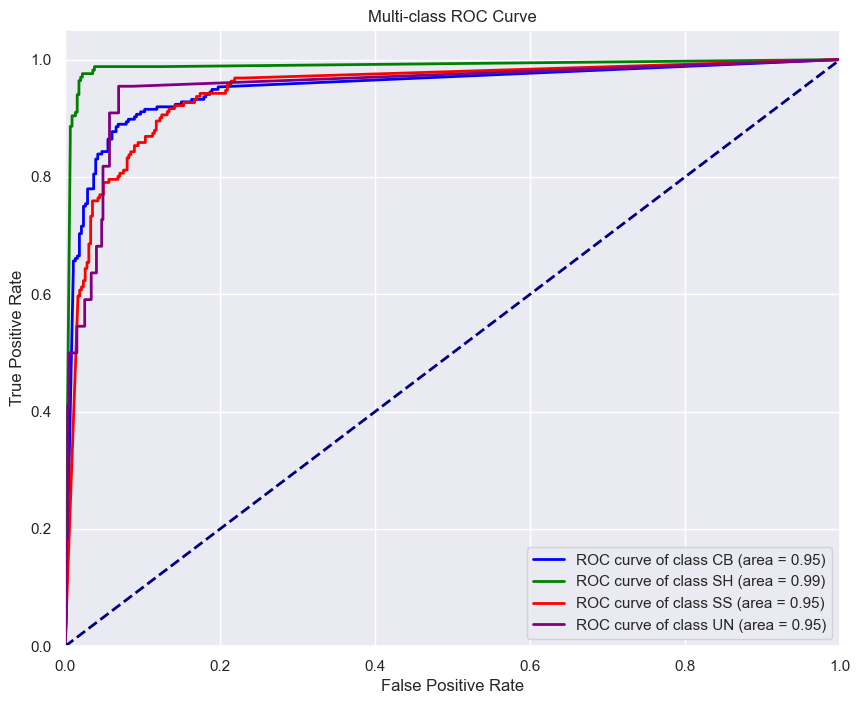

In [202]:
# Assuming you have already calculated 'y_proba' and 'Y_test_binarized' as previously described
classes = np.unique(Y_train)  # Ensure this covers all class labels, 'SS', 'CB', 'SH', 'UN'

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(Y_test_binarized[:, i], y_proba[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plotting the ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple']  # Colors for each line
for i, class_label in enumerate(classes):
    plt.plot(fpr[class_label], tpr[class_label], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_label, roc_auc[class_label]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 3. Gaussian Naive Bayes

In [203]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the parameter grid
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)  # Creates a range of values for var_smoothing
}

In [204]:
# Setup GridSearchCV
gridGNB = GridSearchCV(gnb, param_grid=param_grid_gnb, cv=cv3, verbose=3) 

# Fit GridSearchCV
gridGNB.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END .................var_smoothing=1.0;, score=0.776 total time=   0.0s
[CV 2/3] END .................var_smoothing=1.0;, score=0.793 total time=   0.0s
[CV 3/3] END .................var_smoothing=1.0;, score=0.783 total time=   0.0s
[CV 1/3] END ..var_smoothing=0.8111308307896871;, score=0.776 total time=   0.0s
[CV 2/3] END ..var_smoothing=0.8111308307896871;, score=0.793 total time=   0.0s
[CV 3/3] END ..var_smoothing=0.8111308307896871;, score=0.782 total time=   0.0s
[CV 1/3] END ...var_smoothing=0.657933224657568;, score=0.776 total time=   0.0s
[CV 2/3] END ...var_smoothing=0.657933224657568;, score=0.793 total time=   0.0s
[CV 3/3] END ...var_smoothing=0.657933224657568;, score=0.781 total time=   0.0s
[CV 1/3] END ...var_smoothing=0.533669923120631;, score=0.776 total time=   0.0s
[CV 2/3] END ...var_smoothing=0.533669923120631;, score=0.793 total time=   0.0s
[CV 3/3] END ...var_smoothing=0.53366992312063

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=3)

In [205]:
# Best parameters and best score
print('Best cross-validation score for GNB: ', gridGNB.best_score_)
print('Best parameters for GNB: ', gridGNB.best_params_)

# Get the best estimator directly
best_gnb = gridGNB.best_estimator_
gnbBestParams = gridGNB.best_params_

Best cross-validation score for GNB:  0.8112058465286237
Best parameters for GNB:  {'var_smoothing': 0.01}


In [206]:
# Predict on test data
y_pred = best_gnb.predict(X_test)
y_proba = best_gnb.predict_proba(X_test)  # Use probabilities for all classes

# F1 Score
f1_gnb = f1_score(Y_test, y_pred, average= 'weighted') #class imbalance so weighted

# AUC-ROC Score
# Ensure Y_test is properly encoded if necessary, e.g., using label_binarize for multi-class

classes = np.unique(Y_train)  # This should cover all your class labels
Y_test_binarized = label_binarize(Y_test, classes=classes)

# Now calculate AUC using OvO strategy
auc_gnb = roc_auc_score(Y_test_binarized, y_proba, multi_class='ovo')

# Matthews Correlation Coefficient
mcc_gnb = matthews_corrcoef(Y_test, y_pred)

print("F1 Score GNB: ", f1_gnb)
print("AUC-ROC Score GNB: ", auc_gnb)
print("Matthews Correlation Coefficient GNB: ", mcc_gnb)

F1 Score GNB:  0.7453720000757466
AUC-ROC Score GNB:  0.9161888570126033
Matthews Correlation Coefficient GNB:  0.6431667583259375


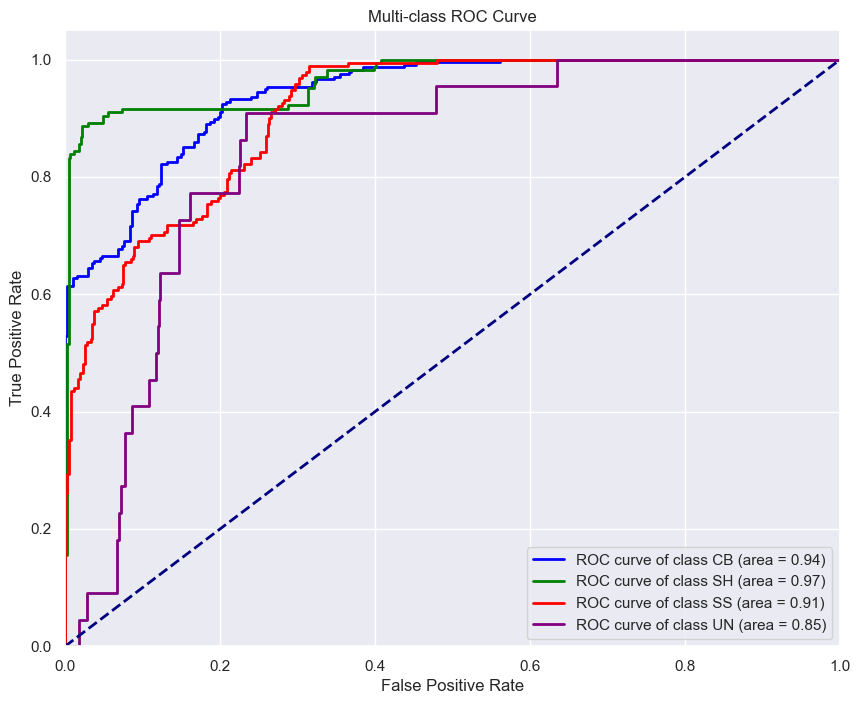

In [207]:
# Assuming you have already calculated 'y_proba' and 'Y_test_binarized' as previously described
classes = np.unique(Y_train)  # Ensure this covers all class labels, 'SS', 'CB', 'SH', 'UN'

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(Y_test_binarized[:, i], y_proba[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plotting the ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple']  # Colors for each line
for i, class_label in enumerate(classes):
    plt.plot(fpr[class_label], tpr[class_label], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_label, roc_auc[class_label]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 4. Support vector (linear)

In [208]:
from sklearn.svm import LinearSVC

#Initialize the LinearSVC classifier
linear_svc = LinearSVC(random_state=42, dual=False)  # dual=False when n_samples > n_features

# Define the parameter grid
param_grid_linear_svc = {
    'C': [0.01, 0.1, 1, 10],  # Example range, adjust based on specific needs
    'loss': ['hinge', 'squared_hinge']
}

In [209]:
# Setup GridSearchCV
gridLinearSVC = GridSearchCV(linear_svc, param_grid=param_grid_linear_svc, cv=cv3, verbose=3)  

# Fit GridSearchCV
gridLinearSVC.fit(X_train, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END ..................C=0.01, loss=hinge;, score=nan total time=   0.0s
[CV 2/3] END ..................C=0.01, loss=hinge;, score=nan total time=   0.0s
[CV 3/3] END ..................C=0.01, loss=hinge;, score=nan total time=   0.0s
[CV 1/3] END ........C=0.01, loss=squared_hinge;, score=0.783 total time=   0.0s
[CV 2/3] END ........C=0.01, loss=squared_hinge;, score=0.814 total time=   0.0s
[CV 3/3] END ........C=0.01, loss=squared_hinge;, score=0.797 total time=   0.0s
[CV 1/3] END ...................C=0.1, loss=hinge;, score=nan total time=   0.0s
[CV 2/3] END ...................C=0.1, loss=hinge;, score=nan total time=   0.0s
[CV 3/3] END ...................C=0.1, loss=hinge;, score=nan total time=   0.0s
[CV 1/3] END .........C=0.1, loss=squared_hinge;, score=0.799 total time=   0.0s
[CV 2/3] END .........C=0.1, loss=squared_hinge;, score=0.831 total time=   0.0s
[CV 3/3] END .........C=0.1, loss=squared_hinge;,

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LinearSVC(dual=False, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [210]:
# Best parameters and best score
print('Best cross-validation score for Linear SVC: ', gridLinearSVC.best_score_)
print('Best parameters for Linear SVC: ', gridLinearSVC.best_params_)

# Get the best estimator directly
best_linear_svc = gridLinearSVC.best_estimator_
linearSvcParams = gridLinearSVC.best_params_

Best cross-validation score for Linear SVC:  0.8347543645960211
Best parameters for Linear SVC:  {'C': 10, 'loss': 'squared_hinge'}


In [211]:
# Predict on test data
y_pred = best_linear_svc.predict(X_test)

# F1 Score
f1_svcLin = f1_score(Y_test, y_pred, average= 'weighted') #class imbalance so weighted

# Obtain decision scores (not probabilities)
y_scores = best_linear_svc.decision_function(X_test)

# F1 Score
f1_svcLin = f1_score(Y_test, y_pred, average='weighted')  # class imbalance so weighted

# AUC-ROC Score
# Binarize the labels in a one-vs-all fashion for multi-class AUC calculation
classes = np.unique(Y_train)  # Ensure this includes all class labels
Y_test_binarized = label_binarize(Y_test, classes=classes)

# Calculate AUC using OvO strategy with decision function scores
auc_svcLin = roc_auc_score(Y_test_binarized, y_scores, multi_class='ovo')

# Matthews Correlation Coefficient
mcc_svcLin = matthews_corrcoef(Y_test, y_pred)

print("F1 Score SVC Linear: ", f1_svcLin)
print("AUC-ROC Score SVC Linear: ", auc_svcLin)
print("Matthews Correlation Coefficient SVC Linear: ", mcc_svcLin)

F1 Score SVC Linear:  0.763827757959636
AUC-ROC Score SVC Linear:  0.9131784529985002
Matthews Correlation Coefficient SVC Linear:  0.6695168197850393


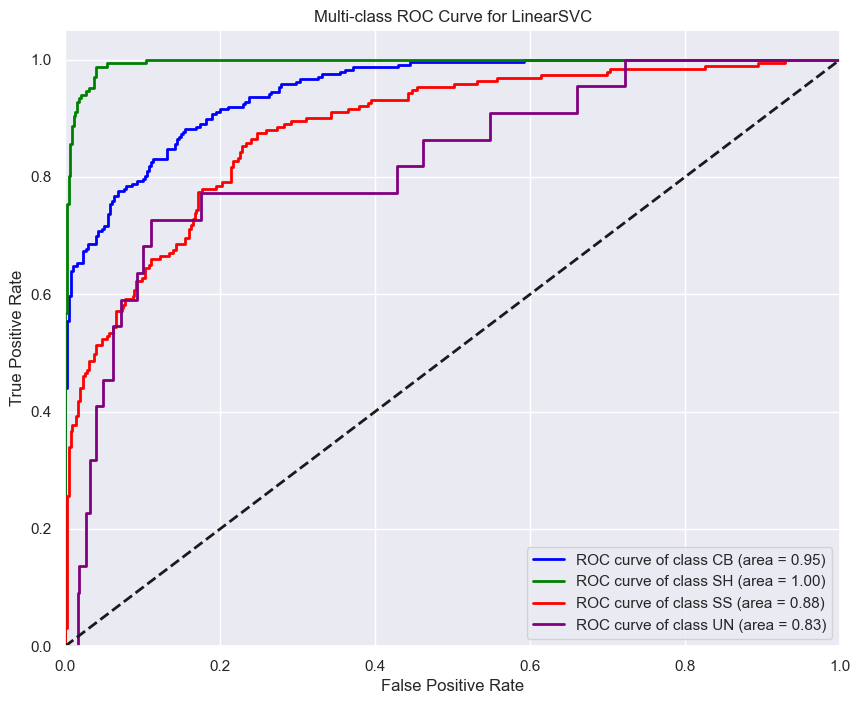

In [212]:
# Assuming y_scores has been computed as decision_function outputs from LinearSVC
# And Y_test_binarized has been prepared as shown previously

classes = np.unique(Y_train)  # Ensuring all class labels are included
n_classes = len(classes)

# Compute ROC curve and ROC area for each class using a one-vs-one approach
fpr = dict()
tpr = dict()
roc_auc = dict()

# Prepare a one-vs-one comparison for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple']  # Define more colors if more than four classes

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve for LinearSVC')
plt.legend(loc="lower right")
plt.show()

### 5. Support vector (RBF)

In [213]:
from sklearn.svm import SVC

# Initialize the SVC with RBF kernel
svc_rbf = SVC(kernel='rbf', probability=True, random_state=42)

# Define the parameter grid
param_grid_svc_rbf = {
    'C': [0.1, 1, 10, 100],  # Adjust based on specific needs
    'gamma': [1e-2, 1e-3, 1e-4, 1e-5]  # Adjust based on specific needs
}

In [214]:
# Setup GridSearchCV
gridSVC_RBF = GridSearchCV(svc_rbf, param_grid=param_grid_svc_rbf, cv=cv3, verbose=3)  
# Fit GridSearchCV
gridSVC_RBF.fit(X_train, Y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.771 total time=   0.4s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.798 total time=   0.4s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.783 total time=   0.3s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.376 total time=   0.5s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.390 total time=   0.4s
[CV 3/3] END ................C=0.1, gamma=0.001;, score=0.382 total time=   0.4s
[CV 1/3] END ...............C=0.1, gamma=0.0001;, score=0.376 total time=   0.4s
[CV 2/3] END ...............C=0.1, gamma=0.0001;, score=0.390 total time=   0.4s
[CV 3/3] END ...............C=0.1, gamma=0.0001;, score=0.382 total time=   0.4s
[CV 1/3] END ................C=0.1, gamma=1e-05;, score=0.376 total time=   0.4s
[CV 2/3] END ................C=0.1, gamma=1e-05;, score=0.390 total time=   0.4s
[CV 3/3] END ................C=0.1, gamma=1e-05;

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [215]:
# Best parameters and best score
print('Best cross-validation score for SVM RBF: ', gridSVC_RBF.best_score_)
print('Best parameters for SVM RBF: ', gridSVC_RBF.best_params_)

# Get the best estimator directly
best_svc_rbf = gridSVC_RBF.best_estimator_
svcRBFcParams = gridSVC_RBF.best_params_

Best cross-validation score for SVM RBF:  0.8676410881039383
Best parameters for SVM RBF:  {'C': 100, 'gamma': 0.01}


In [216]:
# Predict on test data
y_pred_rbf = best_svc_rbf.predict(X_test)
y_proba_rbf = best_svc_rbf.predict_proba(X_test)  # Get probabilities for all classes

# F1 Score
f1_svc_rbf = f1_score(Y_test, y_pred_rbf, average='weighted')  # Class imbalance so weighted

# AUC-ROC Score
auc_svc_rbf = roc_auc_score(Y_test_binarized, y_proba_rbf, multi_class='ovo')

# Matthews Correlation Coefficient
mcc_svc_rbf = matthews_corrcoef(Y_test, y_pred_rbf)

print("F1 Score SVC RBF: ", f1_svc_rbf)
print("AUC-ROC Score SVC RBF: ", auc_svc_rbf)
print("Matthews Correlation Coefficient SVC RBF: ", mcc_svc_rbf)

F1 Score SVC RBF:  0.821845081121889
AUC-ROC Score SVC RBF:  0.9671232360602504
Matthews Correlation Coefficient SVC RBF:  0.7511938414860887


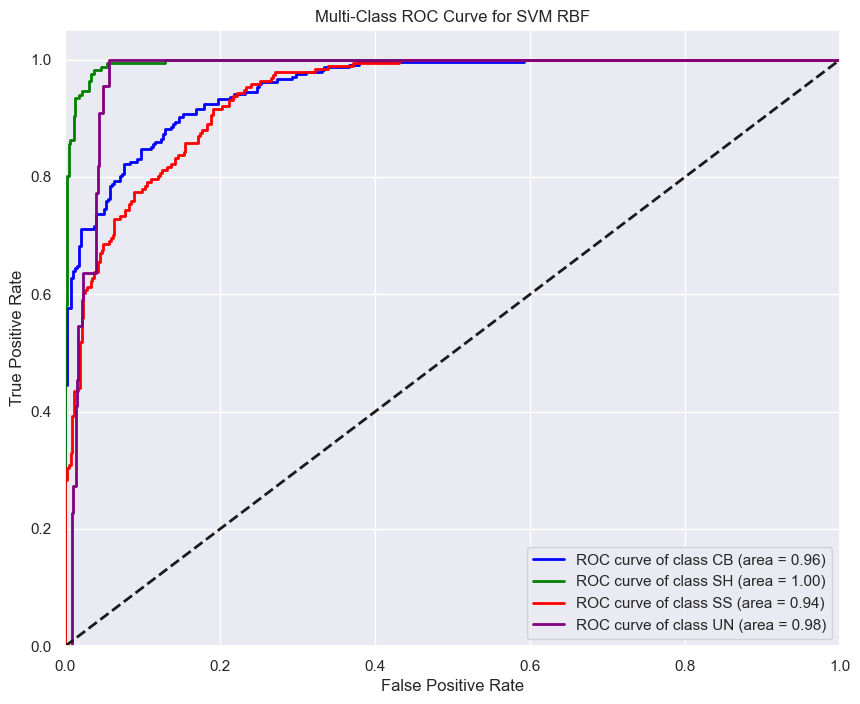

In [217]:
# Assuming best_svc_rbf is your trained SVM RBF model
# Y_test should be binarized as previously detailed, and y_proba_rbf obtained from predict_proba

# You might need to prepare Y_test_binarized if not already done:
classes = np.unique(Y_train)  # Extract the unique classes from the training target
Y_test_binarized = label_binarize(Y_test, classes=classes)

# Calculate ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_proba_rbf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'black', 'brown', 'pink', 'gray', 'olive']  # Color for each class
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve for SVM RBF')
plt.legend(loc="lower right")
plt.show()

### 6. Adaboost

In [218]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost with a base estimator if needed
ada = AdaBoostClassifier(random_state=42)

# Define the parameter grid
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

In [219]:
# Setup GridSearchCV
gridAda = GridSearchCV(ada, param_grid=param_grid_ada, cv=cv3, verbose=3)  

# Fit GridSearchCV
gridAda.fit(X_train, Y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END learning_rate=0.01, n_estimators=50;, score=0.839 total time=   0.1s
[CV 2/3] END learning_rate=0.01, n_estimators=50;, score=0.854 total time=   0.1s
[CV 3/3] END learning_rate=0.01, n_estimators=50;, score=0.825 total time=   0.1s
[CV 1/3] END learning_rate=0.01, n_estimators=100;, score=0.842 total time=   0.2s
[CV 2/3] END learning_rate=0.01, n_estimators=100;, score=0.854 total time=   0.3s
[CV 3/3] END learning_rate=0.01, n_estimators=100;, score=0.827 total time=   0.3s
[CV 1/3] END learning_rate=0.01, n_estimators=200;, score=0.840 total time=   0.5s
[CV 2/3] END learning_rate=0.01, n_estimators=200;, score=0.857 total time=   0.5s
[CV 3/3] END learning_rate=0.01, n_estimators=200;, score=0.828 total time=   0.5s
[CV 1/3] END learning_rate=0.1, n_estimators=50;, score=0.850 total time=   0.1s
[CV 2/3] END learning_rate=0.1, n_estimators=50;, score=0.853 total time=   0.1s
[CV 3/3] END learning_rate=0.1, n_

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

In [220]:
# Best parameters and best score
print('Best cross-validation score for AdaBoost: ', gridAda.best_score_)
print('Best parameters for AdaBoost: ', gridAda.best_params_)

# Get the best estimator directly
best_ada = gridAda.best_estimator_
adaParams = gridAda.best_params_

Best cross-validation score for AdaBoost:  0.8509947218838815
Best parameters for AdaBoost:  {'learning_rate': 0.1, 'n_estimators': 100}


In [221]:
# Predict on test data
y_pred_ada = best_ada.predict(X_test)
y_proba_ada = best_ada.predict_proba(X_test)  # Get probabilities for all classes

# F1 Score
f1_ada = f1_score(Y_test, y_pred_ada, average='weighted')  # Class imbalance so weighted

# AUC-ROC Score
auc_ada = roc_auc_score(Y_test_binarized, y_proba_ada, multi_class='ovo')

# Matthews Correlation Coefficient
mcc_ada = matthews_corrcoef(Y_test, y_pred_ada)

print("F1 Score AdaBoost: ", f1_ada)
print("AUC-ROC Score AdaBoost: ", auc_ada)
print("Matthews Correlation Coefficient AdaBoost: ", mcc_ada)

F1 Score AdaBoost:  0.8330747381717597
AUC-ROC Score AdaBoost:  0.8539387129873364
Matthews Correlation Coefficient AdaBoost:  0.7649985381521888


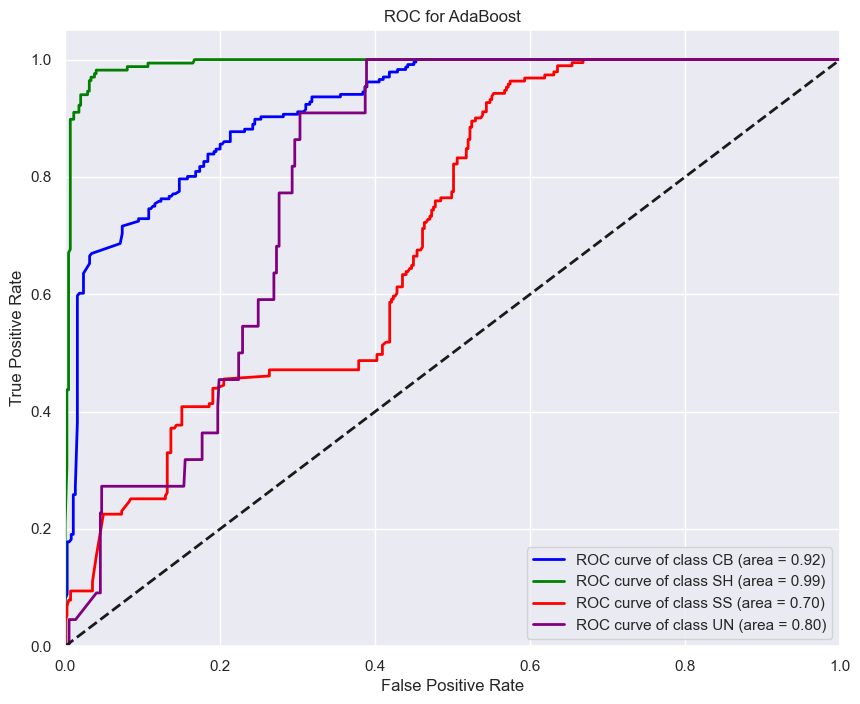

In [222]:
# Calculate FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_proba_ada[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for AdaBoost')
plt.legend(loc="lower right")
plt.show()

### 7. Random forest

In [223]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize label encoder
# label_encoder = LabelEncoder()

# # Assuming Y_train and Y_test are your target variables for training and testing
# Y_train_encoded = label_encoder.fit_transform(Y_train)
# Y_test_encoded = label_encoder.transform(Y_test)

In [224]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(random_state= 42)


# perform hyperparameter optimization for the Regression Forest Regressor

#grid of hyper parametrs, eg min_samples_leaf- i'll try 2 and 5
# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 5, 6],
    'min_samples_leaf': [2, 4, 6]
}

In [225]:
# Setup GridSearchCV
gridRF = GridSearchCV(rfr, param_grid=param_grid_rf, cv=cv3, verbose=3)  
# Fit GridSearchCV
gridRF.fit(X_train, Y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 1/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.866 total time=   0.2s
[CV 2/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.892 total time=   0.2s
[CV 3/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.2s
[CV 1/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.867 total time=   0.2s
[CV 2/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.896 total time=   0.2s
[CV 3/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.862 total time=   0.3s
[CV 1/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.867 total time=   0.5s
[CV 2/3] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.895 total time=   0.4s
[

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 6],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [226]:
# Best parameters and best score
print('Best cross-validation score for Random Forest: ', gridRF.best_score_)
print('Best parameters for Random Forest: ', gridRF.best_params_)

# Get the best estimator directly
best_rf = gridRF.best_estimator_
rfParams = gridRF.best_params_

Best cross-validation score for Random Forest:  0.8924076329679252
Best parameters for Random Forest:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [227]:
# Predict on test data
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)

# Calculate F1 Score, AUC-ROC Score, and Matthews Correlation Coefficient
f1_rf = f1_score(Y_test, y_pred_rf, average='weighted')
classes = np.unique(Y_train)
auc_rf = roc_auc_score(label_binarize(Y_test, classes= classes), y_proba_rf, multi_class='ovo')
mcc_rf = matthews_corrcoef(Y_test, y_pred_rf)

print("F1 Score Random Forest: ", f1_rf)
print("AUC-ROC Score Random Forest: ", auc_rf)
print("Matthews Correlation Coefficient Random Forest: ", mcc_rf)

F1 Score Random Forest:  0.8803350572082884
AUC-ROC Score Random Forest:  0.9762531635199604
Matthews Correlation Coefficient Random Forest:  0.8269001731299858


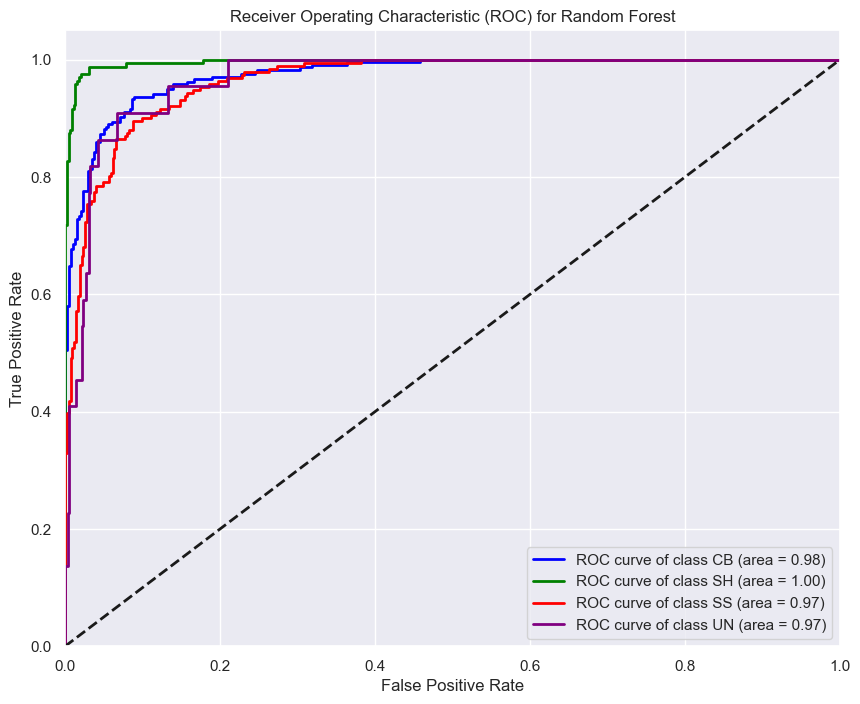

In [228]:
# Assuming Y_test and label_encoder are already defined as shown previously
classes = np.unique(Y_train)
Y_test_binarized = label_binarize(Y_test, classes=classes)

# Calculate FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(classes)

# Get probabilities for all classes
y_proba_rf = best_rf.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_proba_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']  # Ensure you have enough colors for each class

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Random Forest')
plt.legend(loc="lower right")
plt.show()

### 8. Gradient Boosting

In [229]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid_gb = {
    'n_estimators': [50, 70, 90],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [230]:
# Setup GridSearchCV
gridGB = GridSearchCV(gb, param_grid=param_grid_gb, cv=cv3, verbose=3)  

# Fit GridSearchCV
gridGB.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.864 total time=   0.6s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.892 total time=   0.6s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.848 total time=   0.5s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=70;, score=0.868 total time=   0.8s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=70;, score=0.895 total time=   0.8s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=70;, score=0.850 total time=   0.8s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=90;, score=0.873 total time=   1.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=90;, score=0.895 total time=   0.9s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=90;, score=0.859 total time=   0.9s
[CV 1/3] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.877 total ti

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 70, 90]},
             verbose=3)

In [231]:
# Best parameters and best score
print('Best cross-validation score for Gradient Boosting: ', gridGB.best_score_)
print('Best parameters for Gradient Boosting: ', gridGB.best_params_)

# Get the best estimator directly
best_gb = gridGB.best_estimator_
gbParams = gridGB.best_params_

Best cross-validation score for Gradient Boosting:  0.9013398294762484
Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 90}


In [232]:
# Predict on test data
y_pred_gb = best_gb.predict(X_test)
y_proba_gb = best_gb.predict_proba(X_test)  # Get probabilities for all classes

# Calculate F1 Score, AUC-ROC Score, and Matthews Correlation Coefficient
f1_gb = f1_score(Y_test, y_pred_gb, average='weighted')
classes = np.unique(Y_train)
Y_test_binarized = label_binarize(Y_test, classes=classes)
auc_gb = roc_auc_score(Y_test_binarized, y_proba_gb, multi_class='ovo')
mcc_gb = matthews_corrcoef(Y_test, y_pred_gb)

print("F1 Score Gradient Boosting: ", f1_gb)
print("AUC-ROC Score Gradient Boosting: ", auc_gb)
print("Matthews Correlation Coefficient Gradient Boosting: ", mcc_gb)

F1 Score Gradient Boosting:  0.8851875787081211
AUC-ROC Score Gradient Boosting:  0.9747453893409997
Matthews Correlation Coefficient Gradient Boosting:  0.8333462038535682


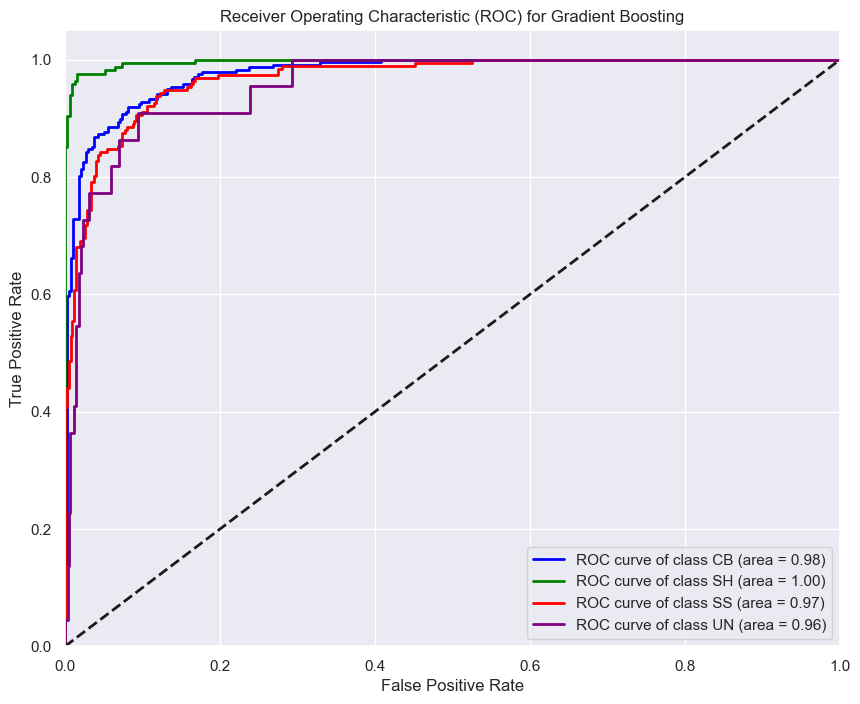

In [233]:
# Calculate FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(classes)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_proba_gb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

### 9. Neural Network

In [234]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
nn = MLPClassifier(random_state=42)

# Define the parameter grid
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Different configurations of layers and neurons
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300, 1000]  # Increased iterations for convergence
}

In [235]:
# Setup GridSearchCV
gridNN = GridSearchCV(nn, param_grid=param_grid_nn, cv=cv3, verbose=3)

# Fit GridSearchCV
gridNN.fit(X_train, Y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=sgd;, score=0.787 total time=   0.5s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=sgd;, score=0.817 total time=   0.6s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=sgd;, score=0.795 total time=   0.7s
[CV 1/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=adam;, score=0.851 total time=   0.7s
[CV 2/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=adam;, score=0.889 total time=   0.6s
[CV 3/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=adam;, score=0.853 total time=   0.6s
[CV 1/3] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=1000

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [300, 1000], 'solver': ['sgd', 'adam']},
             verbose=3)

In [236]:
# Best parameters and best score
print('Best cross-validation score for Neural Network: ', gridNN.best_score_)
print('Best parameters for Neural Network: ', gridNN.best_params_)

# Get the best estimator directly
best_nn = gridNN.best_estimator_
nnParams = gridNN.best_params_

Best cross-validation score for Neural Network:  0.8887535525781568
Best parameters for Neural Network:  {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001, 'max_iter': 300, 'solver': 'adam'}


In [237]:
# Predict on test data
y_pred_nn = best_nn.predict(X_test)
y_proba_nn = best_nn.predict_proba(X_test)  # Ensure your model supports probability estimates

# Calculate F1 Score, AUC-ROC Score, and Matthews Correlation Coefficient
f1_nn = f1_score(Y_test, y_pred_nn, average='weighted')
classes = np.unique(Y_train)
Y_test_binarized = label_binarize(Y_test, classes=classes)
auc_nn = roc_auc_score(Y_test_binarized, y_proba_nn, multi_class='ovo')
mcc_nn = matthews_corrcoef(Y_test, y_pred_nn)

print("F1 Score Neural Network: ", f1_nn)
print("AUC-ROC Score Neural Network: ", auc_nn)
print("Matthews Correlation Coefficient Neural Network: ", mcc_nn)

F1 Score Neural Network:  0.8759245878300255
AUC-ROC Score Neural Network:  0.9749485996848567
Matthews Correlation Coefficient Neural Network:  0.8212566296365229


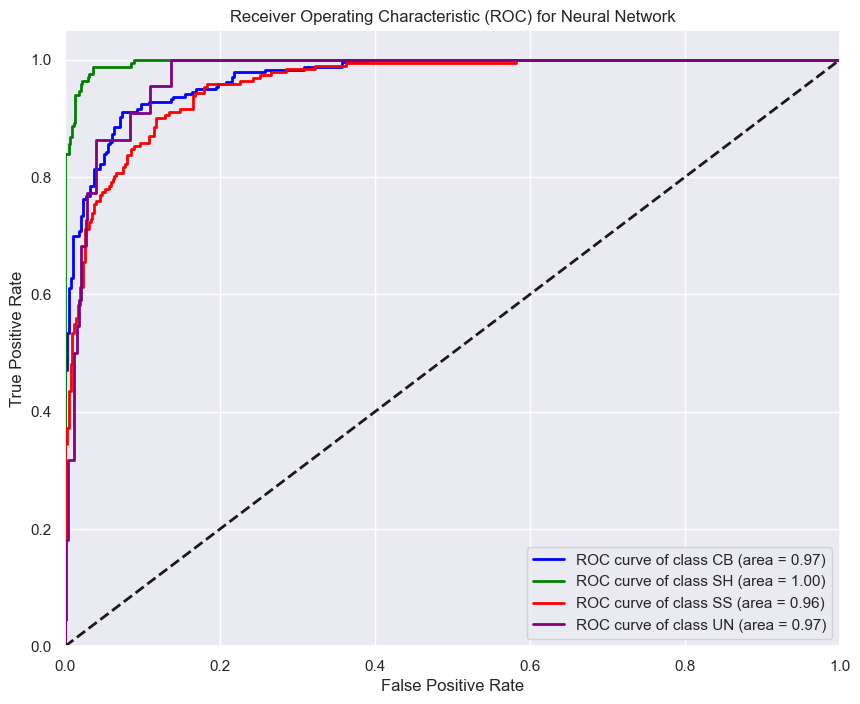

In [238]:
# Calculate FPR, TPR, and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(classes)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_binarized[:, i], y_proba_nn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting each class
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Neural Network')
plt.legend(loc="lower right")
plt.show()

## Q1: Evaluate the classifiers using 3 sklearn metrics, F1 score, Area under the Curve, and Matthews correlation coefficient. Can the metrics take care of class imbalance? Try to ensure the metrics take care of class imbalance. Which is the best metric for the desired task given the class imbalance?

The OvO approach for the AUC-ROC calculation is essential when dealing with multi-class classification tasks. It calculates the AUC for each pair of classes and then averages them. OvO is beneficial in multi-class settings where class imbalance might skew the overall AUC if calculated globally. It ensures that the metric provides a balanced view by considering each class against every other class, minimizing the dominance of larger classes over smaller ones.

The "weighted" average approach for the F1 Score takes into account the support (the number of true instances for each class) when calculating metrics. This method adjusts the F1 Score by the relative size of each class, which is crucial in imbalanced datasets. Larger classes have a proportionately larger impact on the metric than smaller classes, providing a score that reflects the real-world performance of the classifier more accurately than simple averages.

MCC (Matthews Correlation Coefficient) ron the other hand, while it naturally accounts for class imbalance in its formulation, providing a balanced measure of the quality, it is more suitable for binary classifications. We have amulti-class classification problem over here.

## Q2: Which facies is easy to predict? Which facies is hard to predict? Why? Generate confusion matrix for the single best performing model to answer this. Display the confusion matrix.

The SH facies consistently shows AUC values of 1.00 across almost all models, indicating that it is the easiest to predict. This could be due to distinct features that significantly differ from other classes.

Facies UN appears to be the most challenging to predict reliably across multiple models, particularly highlighted by its performance in the Linear SVM setting. This difficulty might be due to a lack of distinctive features, a smaller number of samples in the training data, or similarities in features with other facies, which confounds the models more than other classes. The second hardest, based on AUC, is SS with an AUC of 0.88 in the Linear SVM model, indicating some difficulty but not as pronounced as with UN.

Considering the AUC values across all classes and models, Gradient Boosting and Random Forest show consistently high performance across all facies. Specifically, Random Forest has an edge with slightly higher AUC values for most facies and overall balance.

#### Recommendation:
Given this analysis, Random Forest would be the best model to use for this classification task, considering it handles class imbalances well with high AUC scores across all facies.

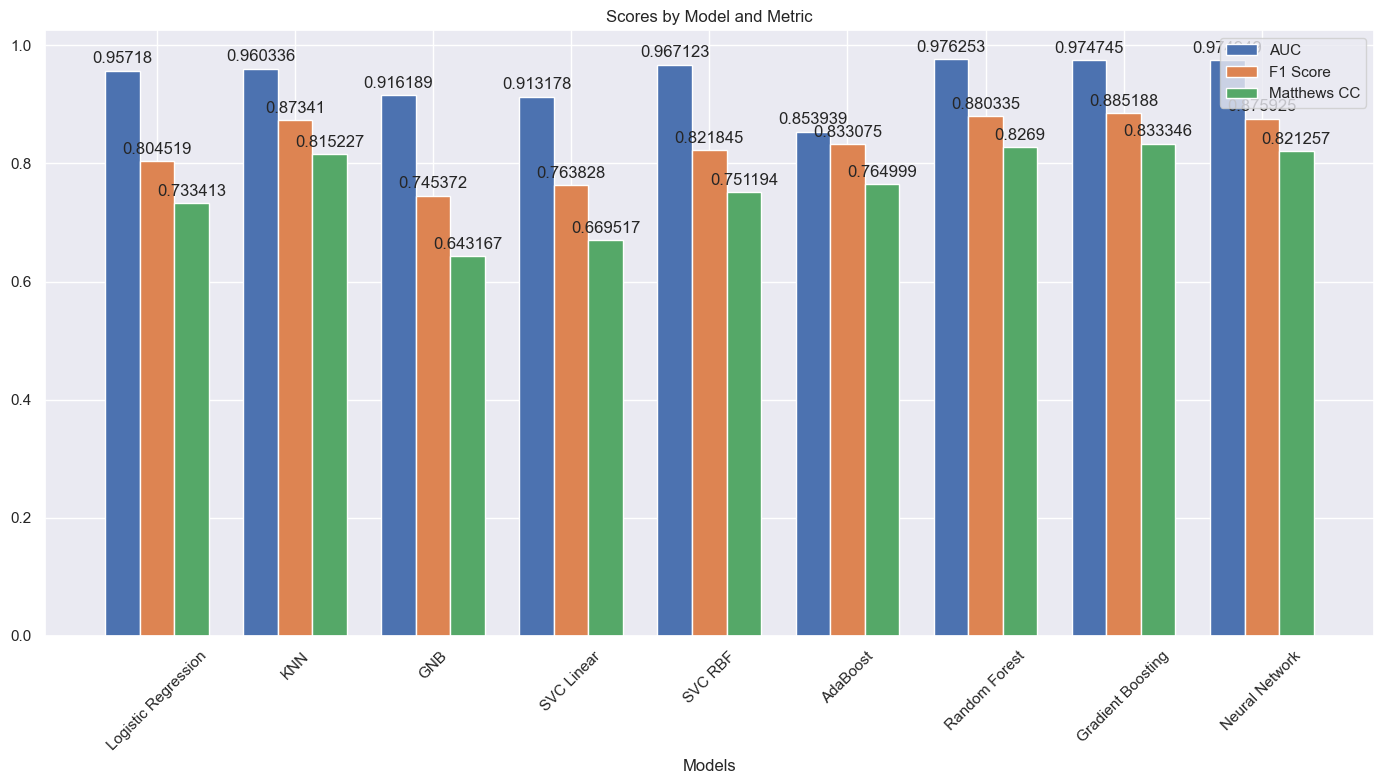

In [239]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'KNN', 'GNB', 'SVC Linear', 'SVC RBF', 'AdaBoost', 'Random Forest', 'Gradient Boosting', 'Neural Network']
auc_scores = [auc_lrc, auc_knn, auc_gnb, auc_svcLin, auc_svc_rbf, auc_ada, auc_rf, auc_gb, auc_nn]
f1_scores = [f1_lrc, f1_knn, f1_gnb, f1_svcLin, f1_svc_rbf, f1_ada, f1_rf, f1_gb, f1_nn]
mcc_scores = [mcc_lrc, mcc_knn, mcc_gnb, mcc_svcLin, mcc_svc_rbf, mcc_ada, mcc_rf, mcc_gb, mcc_nn]

x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width, auc_scores, width, label='AUC')
rects2 = ax.bar(x, f1_scores, width, label='F1 Score')
rects3 = ax.bar(x + width, mcc_scores, width, label='Matthews CC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_title('Scores by Model and Metric')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

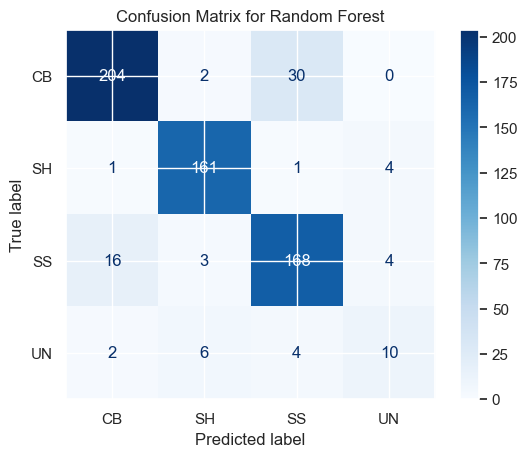

In [240]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_rf = best_rf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(Y_test, y_pred_rf, labels=best_rf.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [241]:
## Pickling the top 3 models for Deploy.ipynb

# Define filenames for each model
gradient_boosting_model_filename = 'Deploy_Gradient_Boosting_Model_secondbest.sav'
random_forest_model_filename = 'Deploy_Random_Forest_Model_best.sav'
neural_network_model_filename = 'Deploy_Neural_Network_Model_thirdbest.sav'

# Pickle the Gradient Boosting model
with open(gradient_boosting_model_filename, 'wb') as file:
    pickle.dump(best_gb, file)

# Pickle the Random Forest model
with open(random_forest_model_filename, 'wb') as file:
    pickle.dump(best_rf, file)

# Pickle the Neural Network model
with open(neural_network_model_filename, 'wb') as file:
    pickle.dump(best_nn, file)